# Phase 2- Exploratory Data Analysis


In [1]:
# We will be loading the train and test data for doing EDA
# Reference https://www.kaggle.com/code/emilyjiminroh/data-exploration-porto-seguro-s-safe-driver
# https://hemanthsagar1995.medium.com/porto-seguros-safe-driver-prediction-a1b9401da661
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
train=pd.read_csv('train.csv',index_col='id')
test=pd.read_csv('test.csv')




In [2]:
# We are checking the top 5 data in our training data set.
train.head()

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
id                                                                              
7        0          2              2          5              1              0   
9        0          1              1          7              0              0   
13       0          5              4          9              1              0   
16       0          0              1          2              0              0   
17       0          0              2          0              1              0   

    ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
id                                                              ...   
7               0              1              0              0  ...   
9               0              0              1              0  ...   
13              0              0              1              0  ...   
16              1              0              0              0  ...   
17              1              0              0              0  ...   

    ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
id                                                                   
7            9           1           5           8               0   
9            3           1           1           9               0   
13           4           2           7           7               0   
16           2           2           4           9               0   
17           3           1           1           3               0   

    ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
id                                                                   
7                1               1               0               0   
9                1               1               0               1   
13               1               1               0               1   
16               0               0               0               0   
17               0               0               1               1   

    ps_calc_20_bin  
id                  
7                1  
9                0  
13               0  
16               0  
17               0  

[5 rows x 58 columns]

In [14]:
train.shape

(595212, 58)

In [15]:
test.shape

(892816, 58)

In [16]:
# We are checking if our data set is having null value or not
train.isnull().any()

target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04      

In [17]:
# We checking duplicate values in our train data set.
train.duplicated().sum()

0

In [18]:
# Below code will check whether ther is any duplicate data in our test data set.
test.duplicated().sum()

0

There are no duplicate data in the dataset.

In [19]:
# Our data set contains -1 value which represents missing data or null value.
(train==-1).any()

target            False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12          True
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04      

In [20]:
# we are checking the unique values in our train data set.
train.nunique()

target                2
ps_ind_01             8
ps_ind_02_cat         5
ps_ind_03            12
ps_ind_04_cat         3
ps_ind_05_cat         8
ps_ind_06_bin         2
ps_ind_07_bin         2
ps_ind_08_bin         2
ps_ind_09_bin         2
ps_ind_10_bin         2
ps_ind_11_bin         2
ps_ind_12_bin         2
ps_ind_13_bin         2
ps_ind_14             5
ps_ind_15            14
ps_ind_16_bin         2
ps_ind_17_bin         2
ps_ind_18_bin         2
ps_reg_01            10
ps_reg_02            19
ps_reg_03          5013
ps_car_01_cat        13
ps_car_02_cat         3
ps_car_03_cat         3
ps_car_04_cat        10
ps_car_05_cat         3
ps_car_06_cat        18
ps_car_07_cat         3
ps_car_08_cat         2
ps_car_09_cat         6
ps_car_10_cat         3
ps_car_11_cat       104
ps_car_11             5
ps_car_12           184
ps_car_13         70482
ps_car_14           850
ps_car_15            15
ps_calc_01           10
ps_calc_02           10
ps_calc_03           10
ps_calc_04      

In [8]:
# We are now preparing the list of all different types of features in our data set
# 1. Numberical features
# 2. Categorical features
# 3.Binary features
# All features
all_features=train.columns.tolist()
all_features.remove('target')
# numeric features
num_features=[n for n in all_features if n[-3:] not in ['bin','cat']]
# Categorical features
cat_features=[c for c in all_features if c[-3:]=='cat']
# Binary features
bin_features=[b for b in all_features if b[-3:]=='bin']

In [9]:
# We need to map target columns as Insurance claimed or not Claimed
# We are considering '0' as not claimed '1' as Claimed
train['Insurance_Claimed'] = train['target'].map({0: 'Claim Not Filed', 1: 'Claim Filed'})

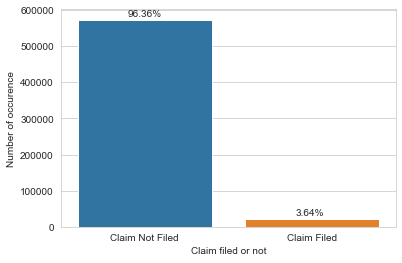

In [11]:
# We will be plotting graph to see the how many people the have claimed insurance and how many have not claimed
warnings.filterwarnings("ignore")
v=sns.countplot(train.Insurance_Claimed)
for x in v.patches:
    v.annotate('{:.2f}%'.format(100*x.get_height()/len(train['target'])), 
                (x.get_x() + 0.3, x.get_height() + 10000))
plt.xlabel('Claim filed or not')
plt.ylabel('Number of occurence')
sns.set_style("whitegrid")
plt.show()

We can see here that 96.36% driver have not claimed insurance and 3.64% driver have claimed insurance.

# Corelation between features

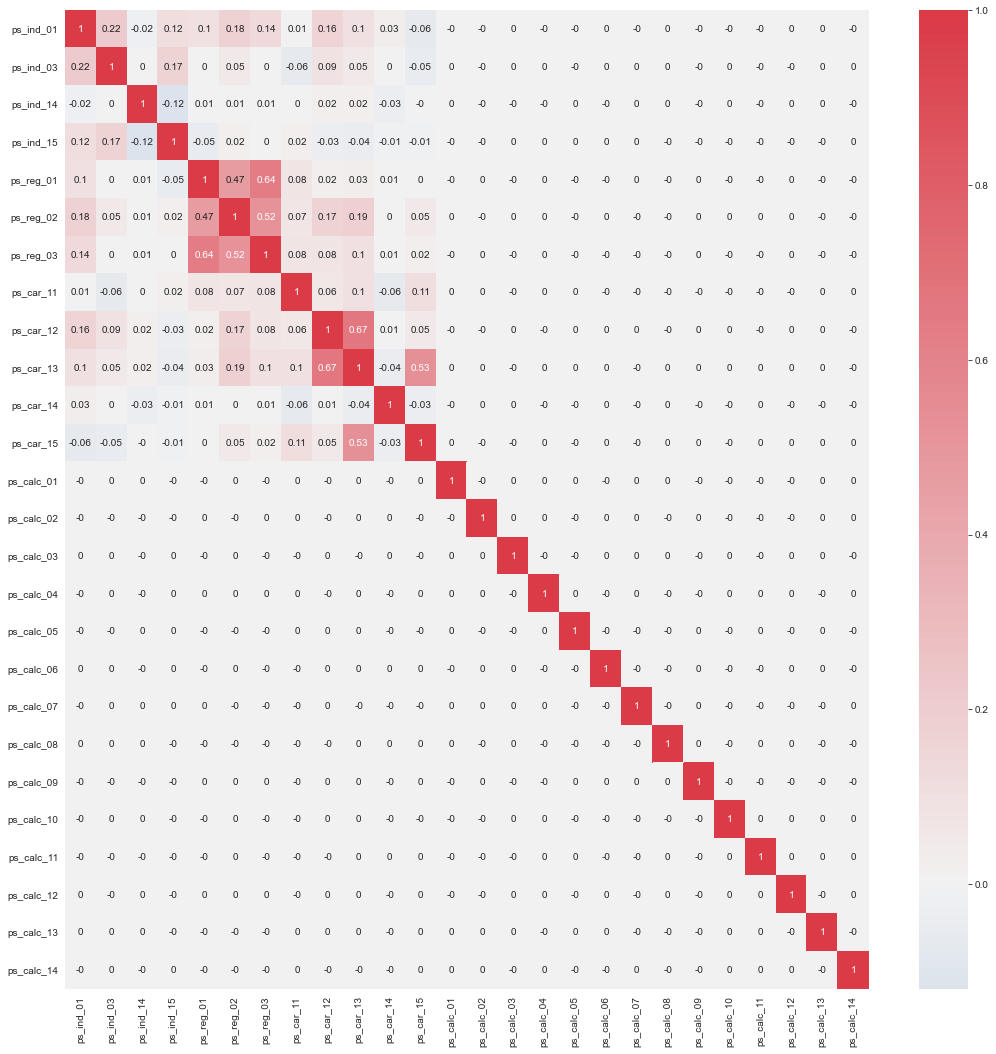

In [6]:
# we are using heat map to find the corelation between features
core_matrix = train[num_features].corr().round(2)
fig = plt.figure(figsize=(18,18));
sns.heatmap(core_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

ps_reg_02 and ps_reg_03

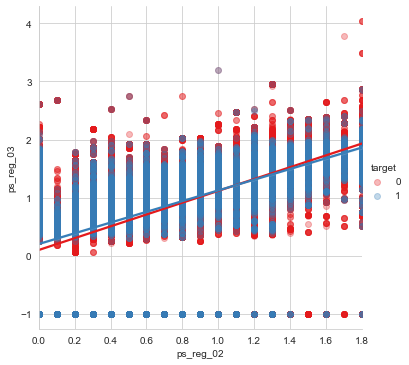

In [10]:
# We are plotting scatter plot to show the correlation between region 2 and region 3.
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=train, hue = 'target', palette = 'Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_12 and ps_car_13 correlation.

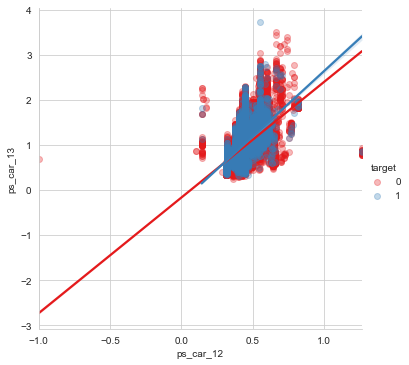

In [15]:
# We are trying to plot scatter plot to show the correlation between car 12 and car 13.
sns.lmplot(x='ps_car_12', y='ps_car_13', data=train, hue = 'target', palette = 'Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_15 & ps_car_13

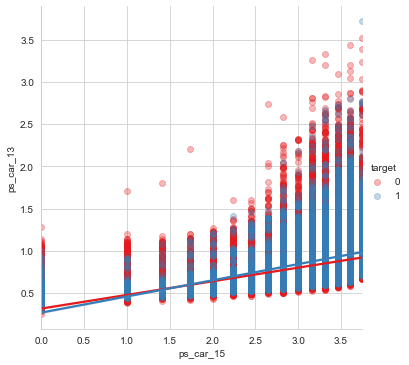

In [16]:
# We are trying to plot scatter plot to show the correlation between car 15 and car 13.
sns.lmplot(x='ps_car_15', y='ps_car_13', data=train, hue = 'target', palette = 'Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_12 & ps_car_14

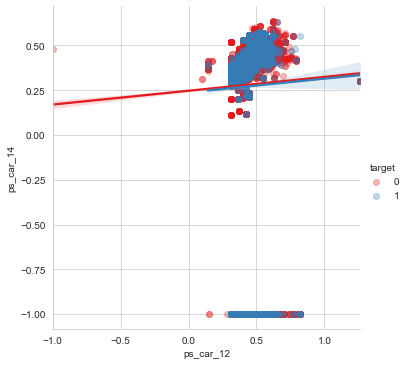

In [12]:
# We are trying to plot scatter plot to show the correlation between car 12 and car 14.
sns.lmplot(x='ps_car_12', y='ps_car_14', data=train, hue = 'target', palette = 'Set1', scatter_kws={'alpha':0.3})
plt.show()

In [26]:
# We checking the missed value by percentage
miss_values=train.eq(-1).sum()
column_name=train.columns
for i in range(len(miss_values)):
    if miss_values[i]!=0:
        print("The missing value % in column",column_name[i],"is", miss_values[i]*100/595212,'%')

The missing value % in column ps_ind_02_cat is 0.03628959093566662 %
The missing value % in column ps_ind_04_cat is 0.013944611331760785 %
The missing value % in column ps_ind_05_cat is 0.975954785857812 %
The missing value % in column ps_reg_03 is 18.106489788512327 %
The missing value % in column ps_car_01_cat is 0.01797678810239041 %
The missing value % in column ps_car_02_cat is 0.0008400368272145051 %
The missing value % in column ps_car_03_cat is 69.08983689844963 %
The missing value % in column ps_car_05_cat is 44.78253126617071 %
The missing value % in column ps_car_07_cat is 1.9302366215734899 %
The missing value % in column ps_car_09_cat is 0.09559619093701067 %
The missing value % in column ps_car_11 is 0.0008400368272145051 %
The missing value % in column ps_car_12 is 0.000168007365442901 %
The missing value % in column ps_car_14 is 7.160473915176441 %


# Numerical Feature EDA

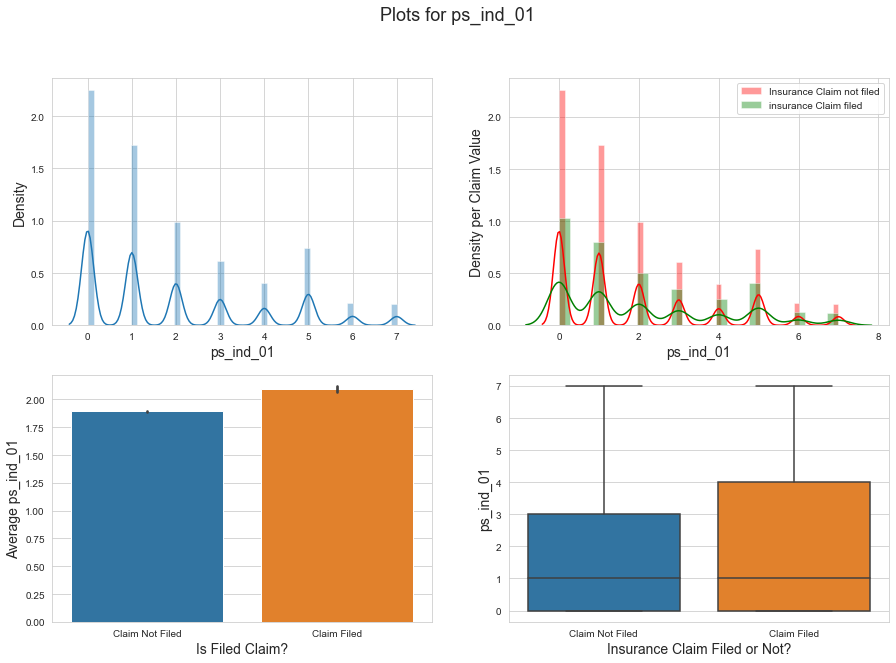

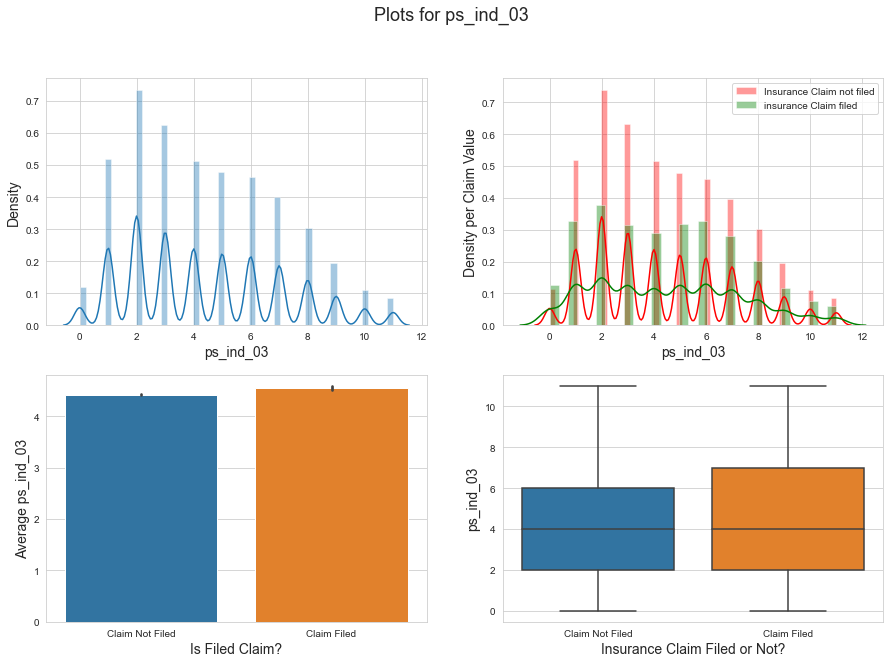

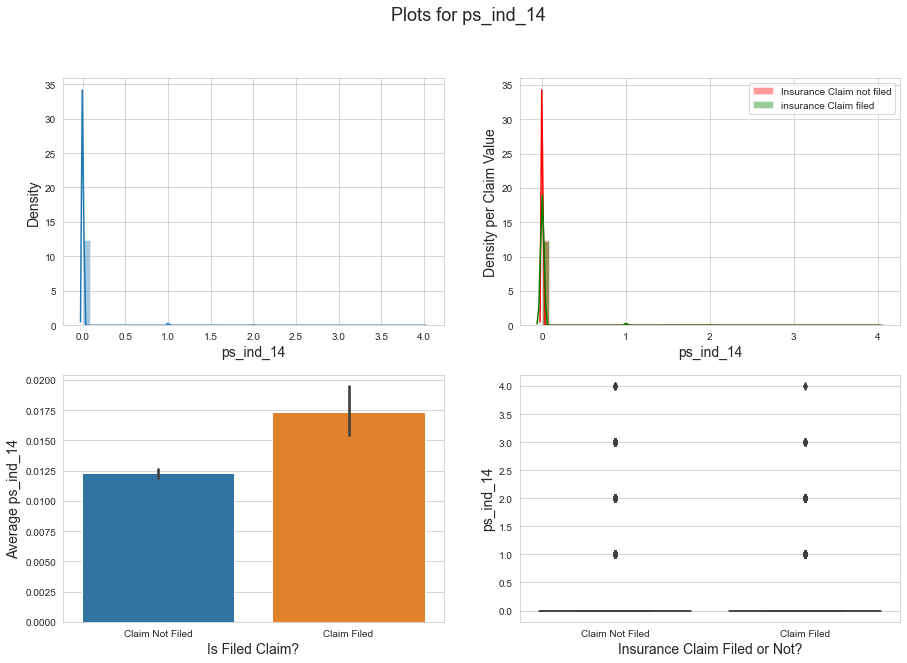

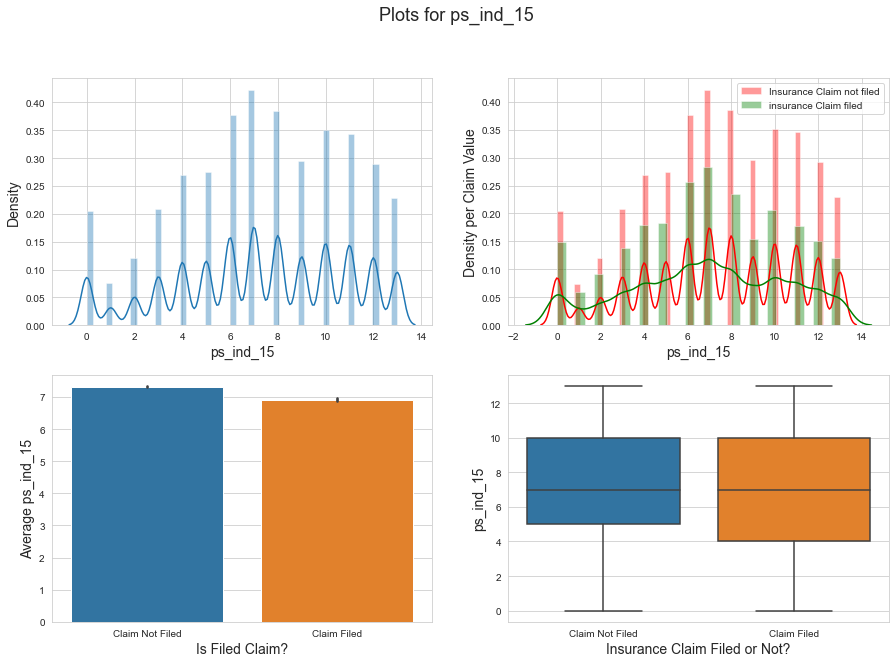

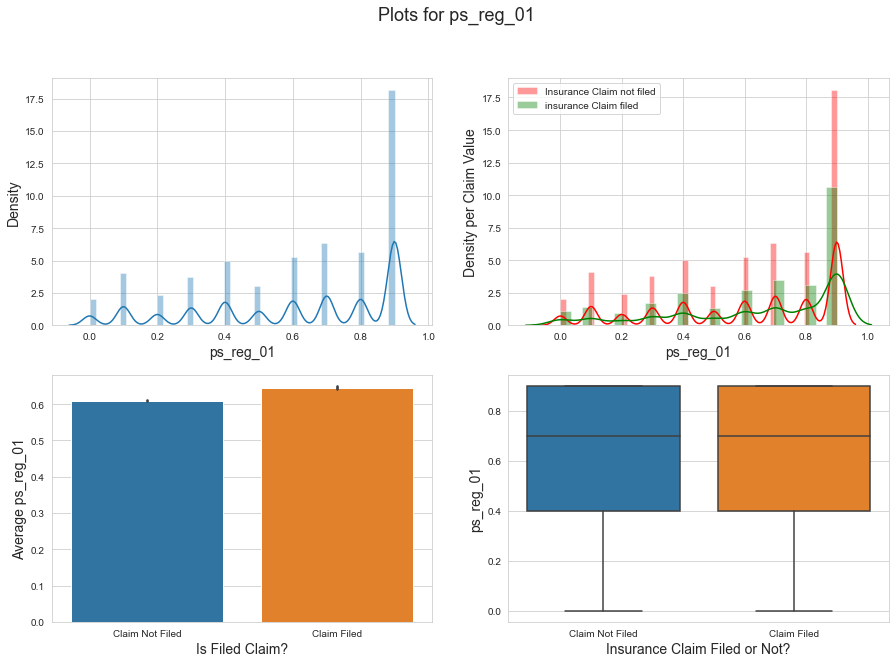

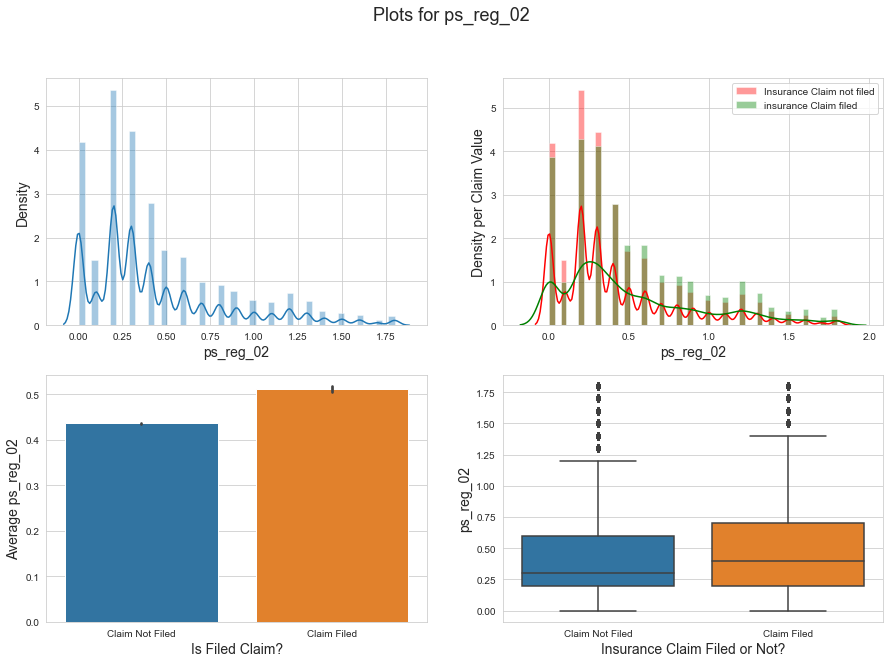

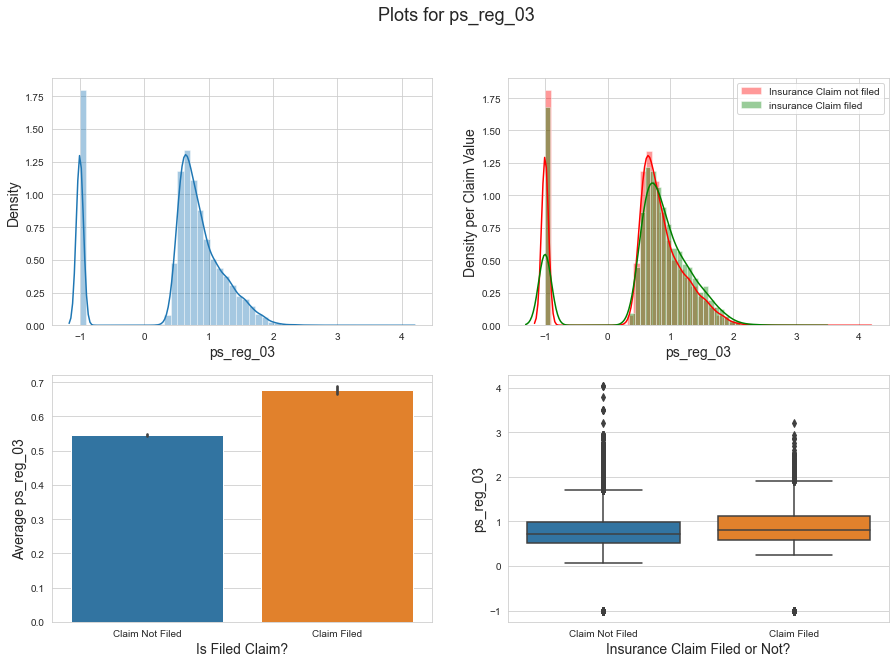

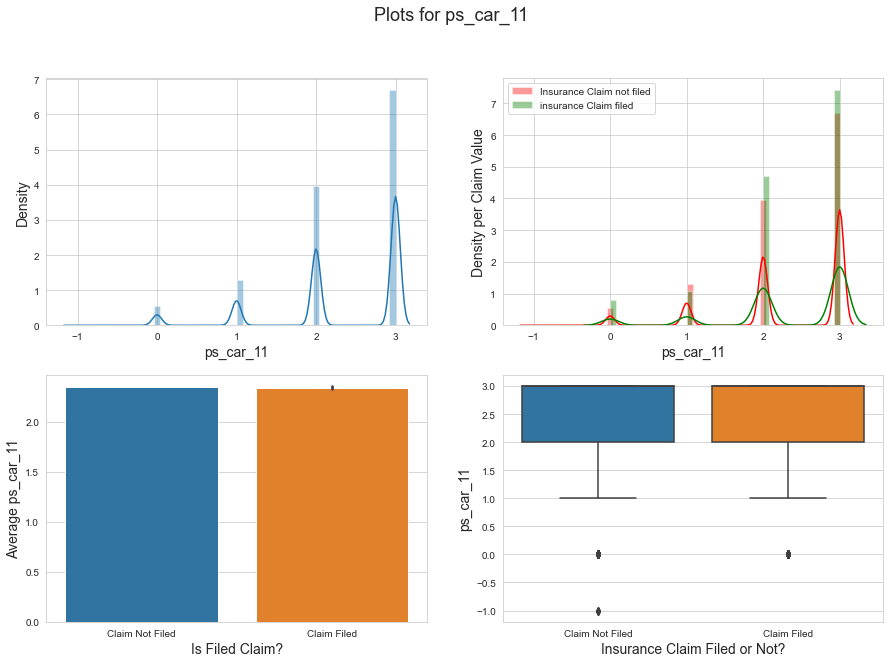

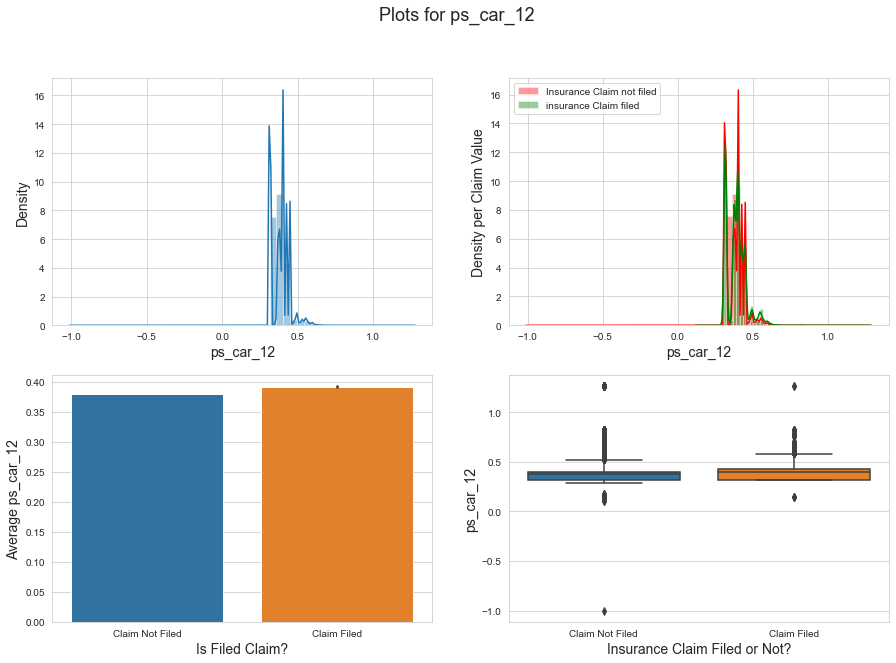

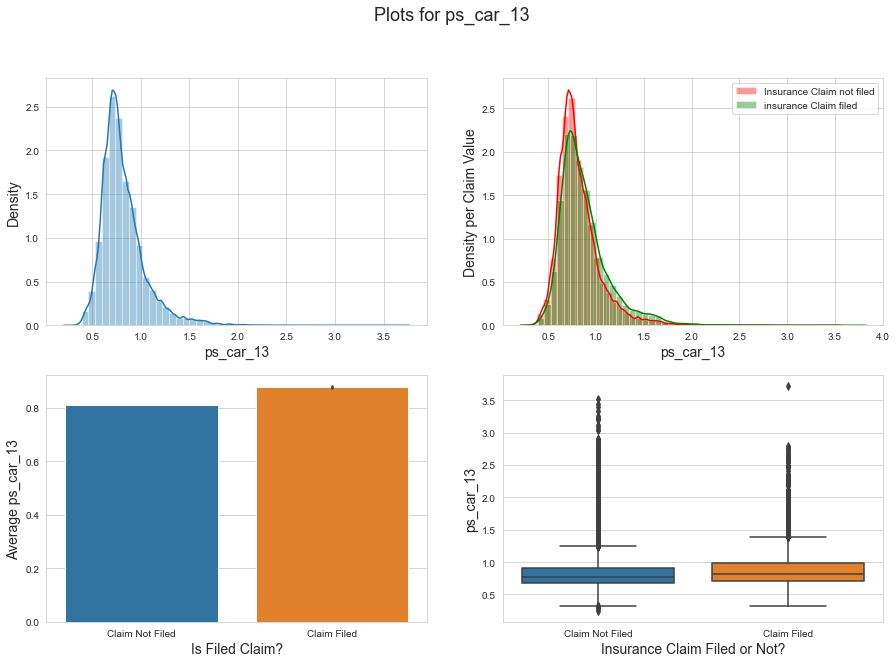

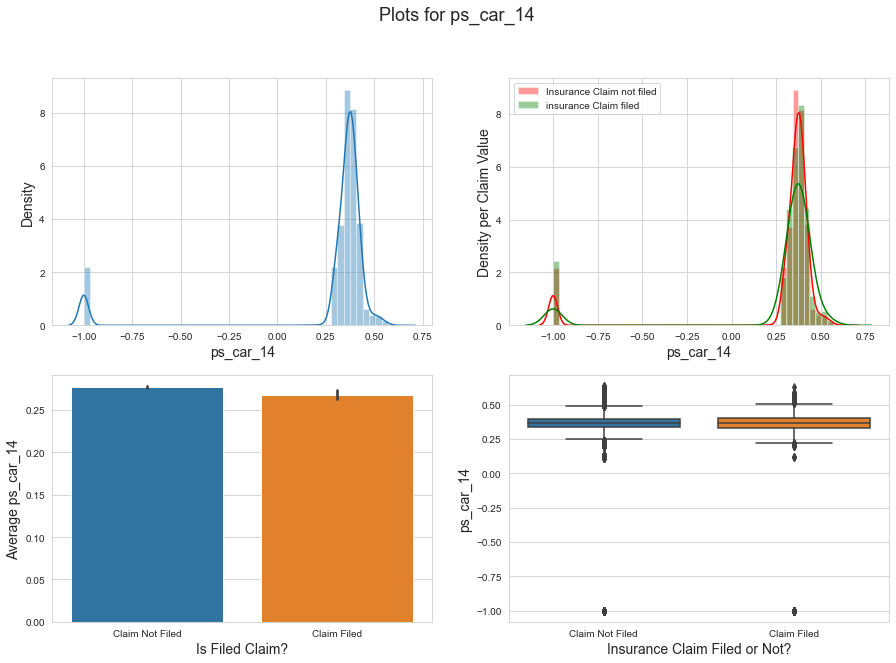

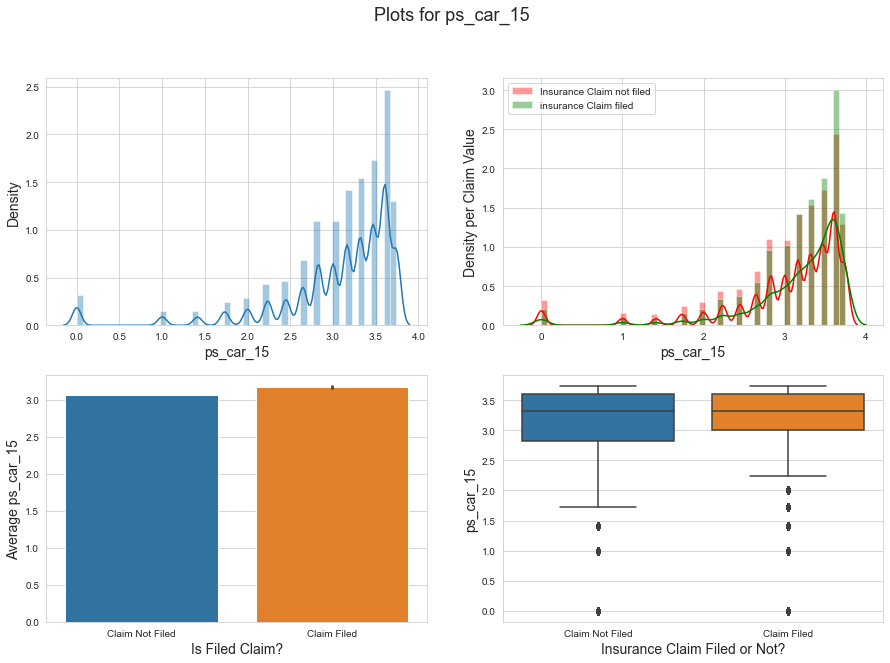

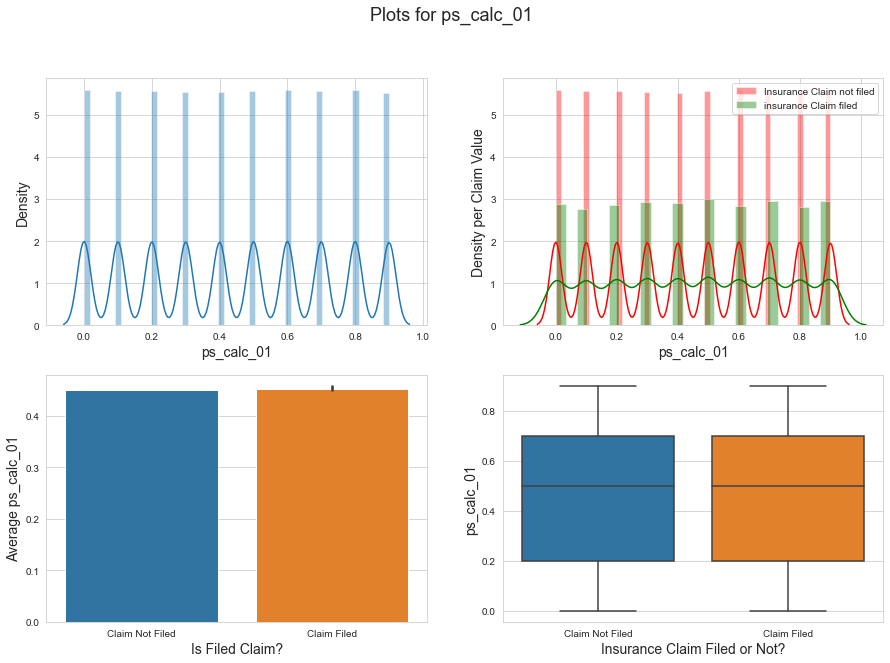

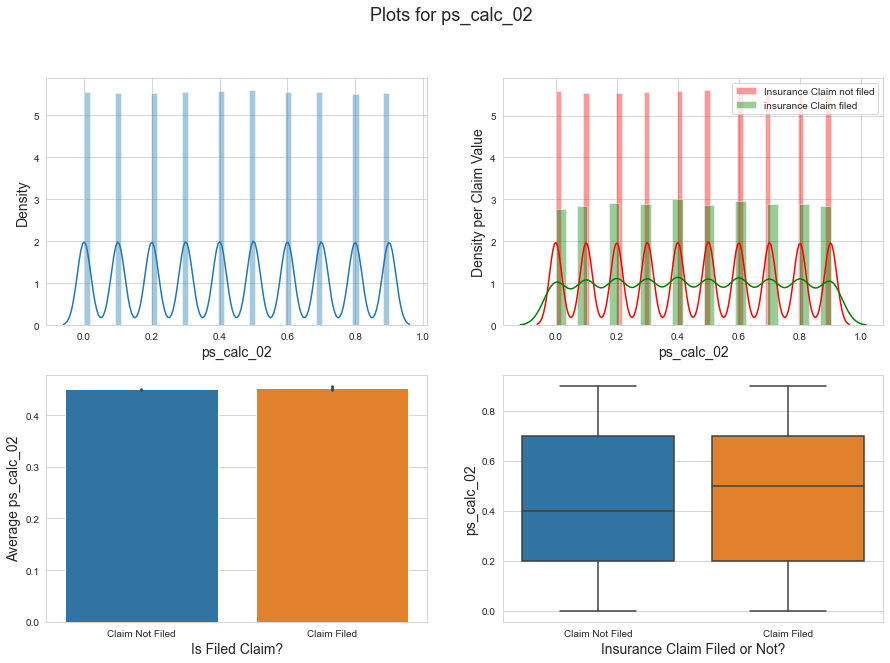

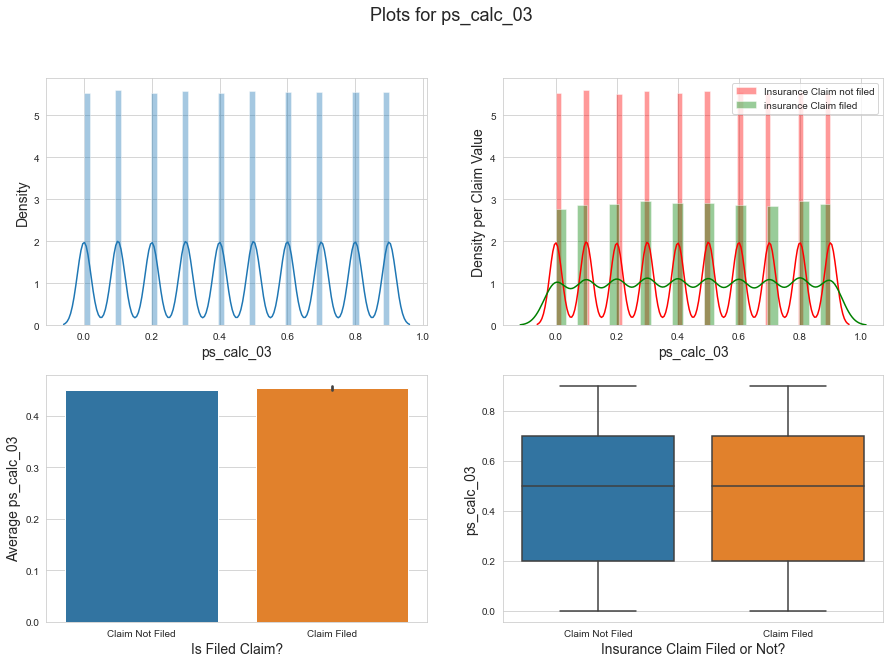

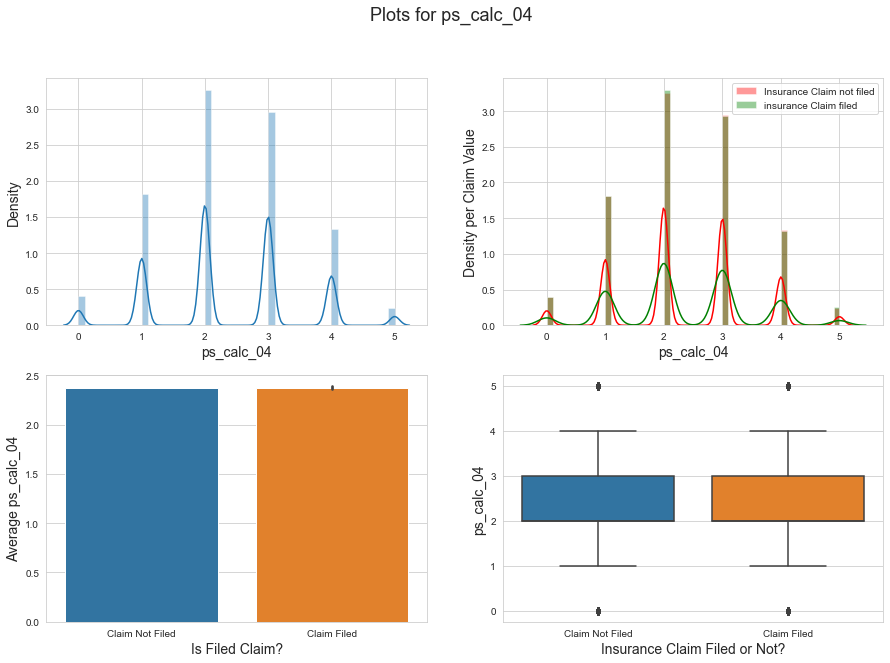

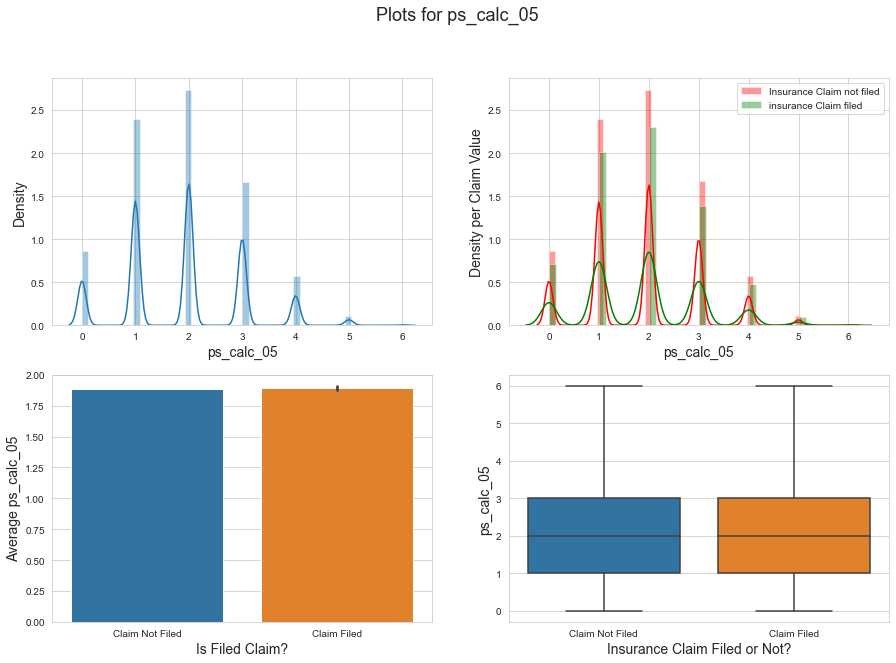

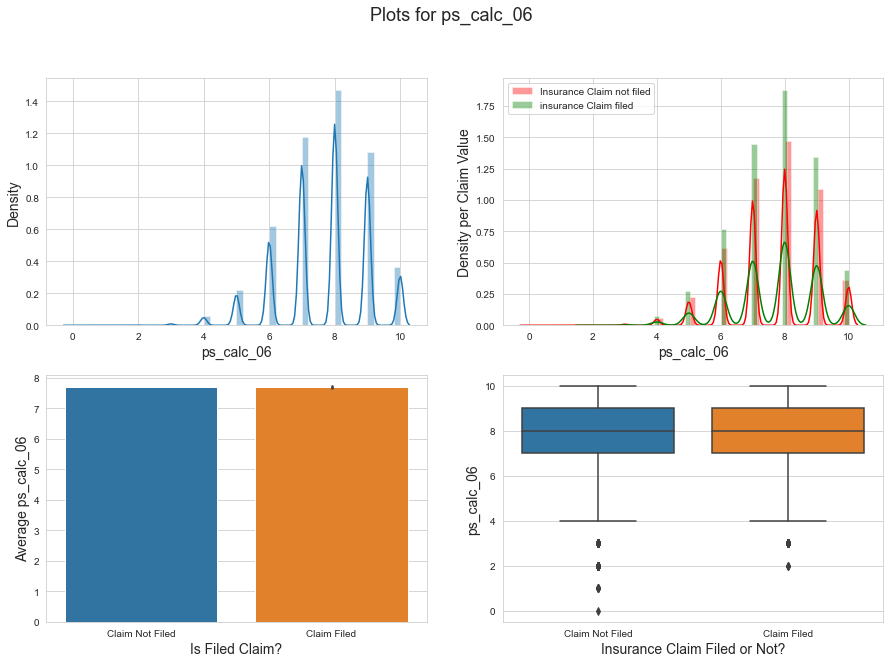

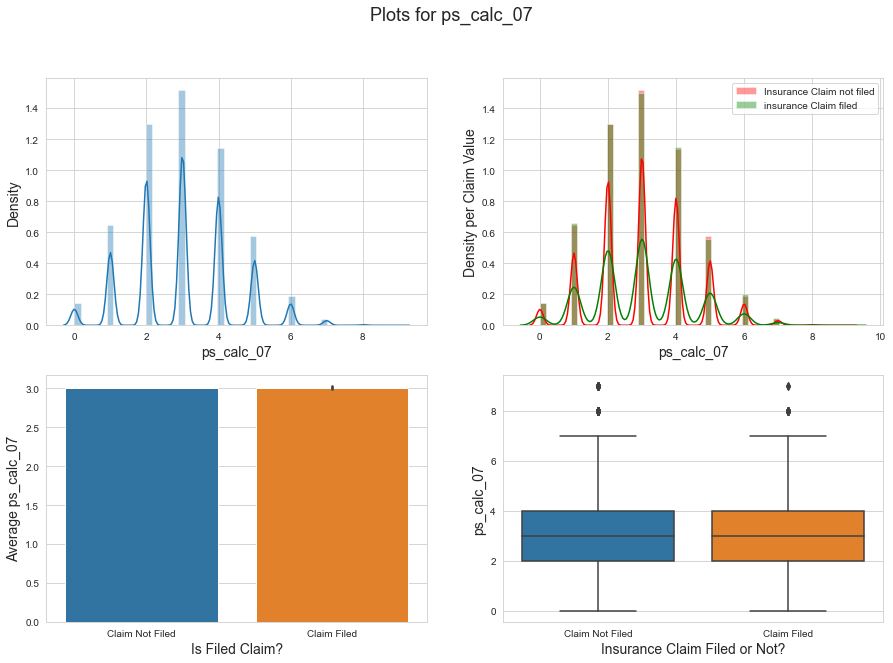

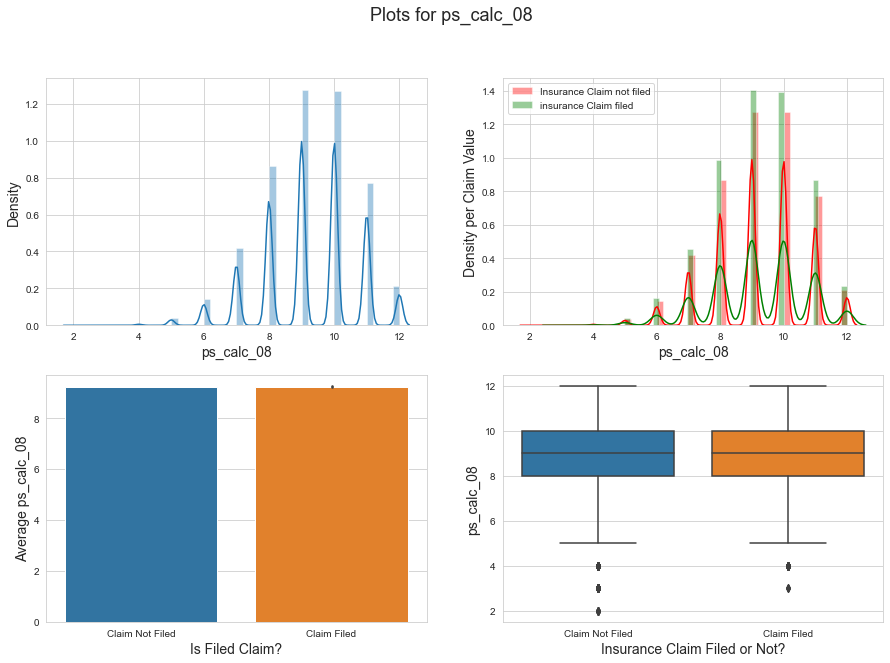

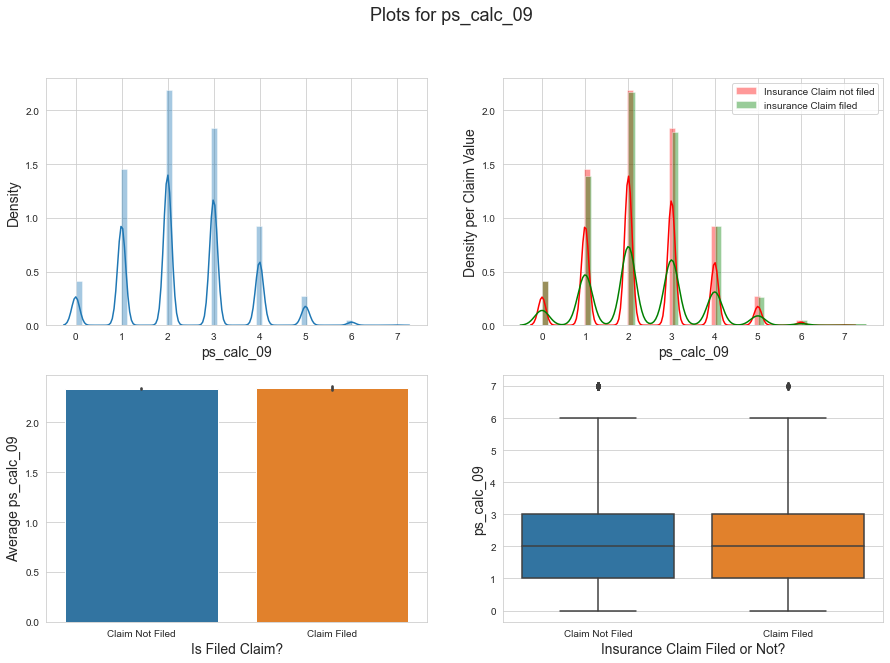

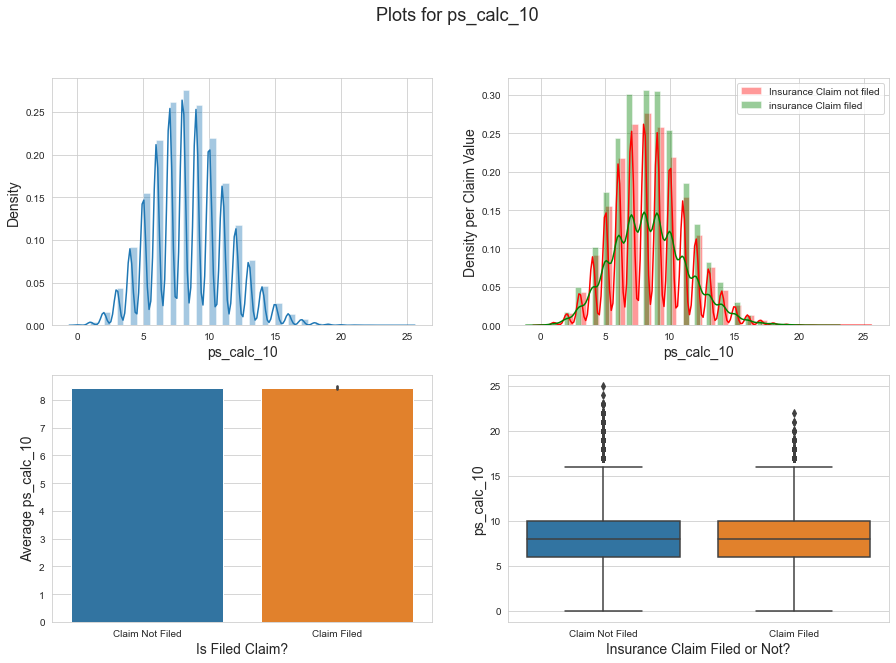

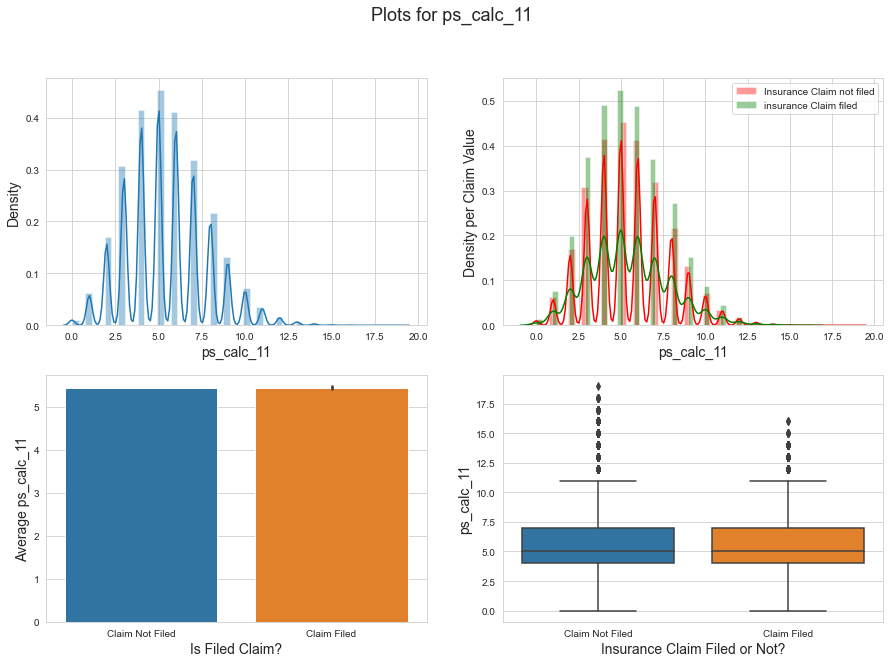

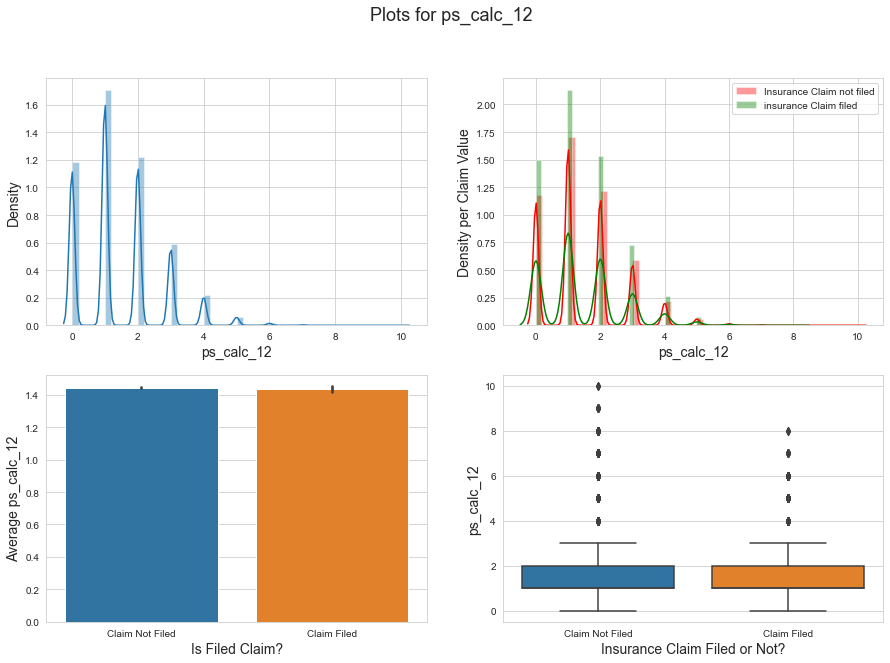

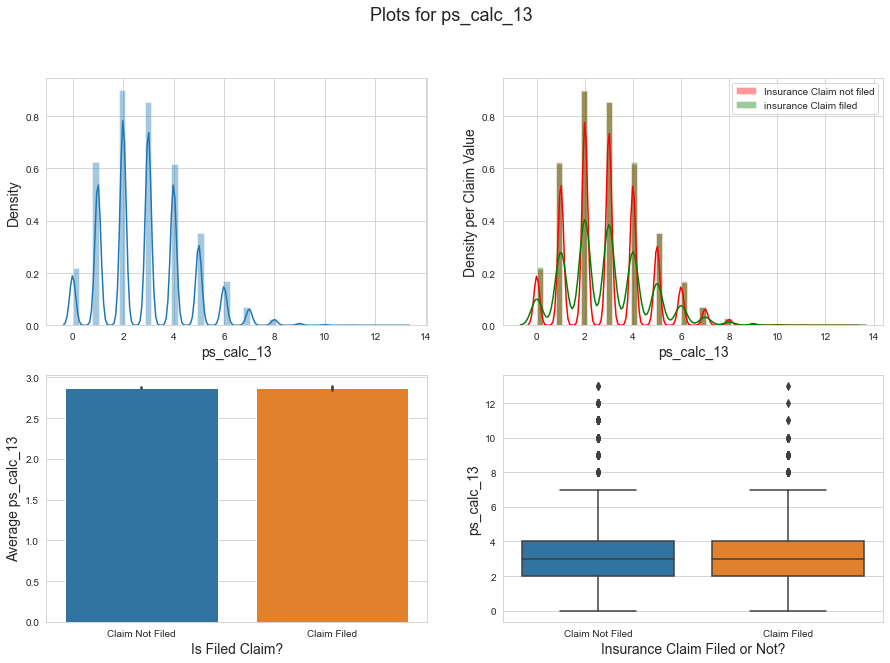

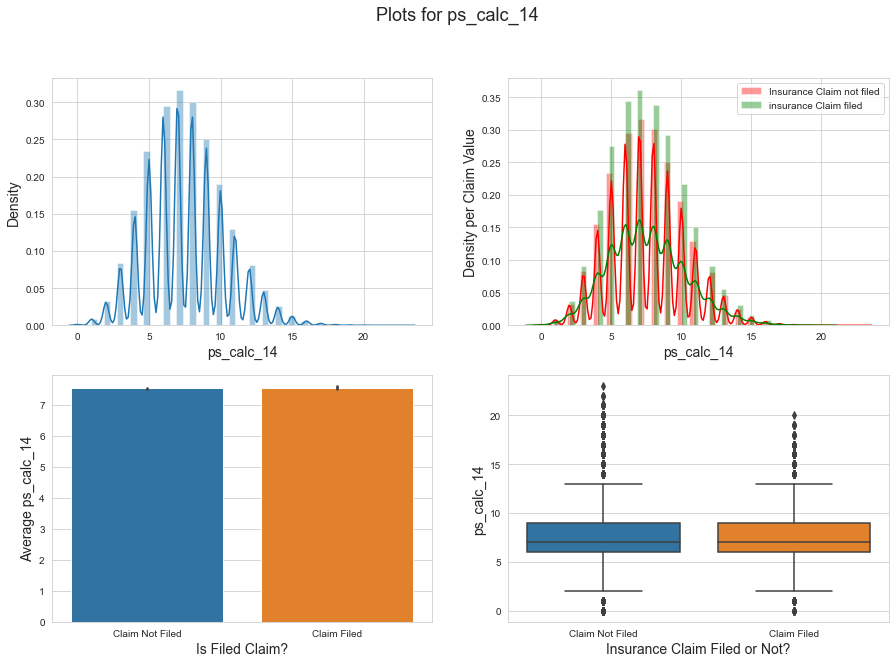

In [18]:
# plotting graphs for numerical features.
# we interating through all the numeric features present in our data set and plotting the graphs.
for column in num_features:
     fig = plt.figure(figsize=(15,10))
     sns.distplot(train[column], ax=plt.subplot(221));
    # Label for x-axis
     plt.xlabel(column, fontsize=14);
    # Label for y-axis.
     plt.ylabel('Density', fontsize=14);
    # Adding title for all the colums we are plotting in our data set.
     plt.suptitle('Plots for '+column, fontsize=18);
  # below code we are plotting histogram for all drivers who have not filed insurance claim.      
     sns.distplot(train.loc[train.target==0, column], color='red', label='Insurance Claim not filed', ax=plt.subplot(222));
    # below code we are plotting histogram for all drivers who have filed insurance claim. 
     sns.distplot(train.loc[train.target==1, column], color='green', label='insurance Claim filed', ax=plt.subplot(222));
     plt.legend(loc='best')
    # label for x-axis in our plot.
     plt.xlabel(column, fontsize=14);
    # Label for y-axis in our plot.
     plt.ylabel('Density per Claim Value', fontsize=14);
    # Average column value per claim value.
     sns.barplot(x="Insurance_Claimed", y=column, data=train, ax=plt.subplot(223));
     plt.xlabel('Is Filed Claim?', fontsize=14);
     plt.ylabel('Average ' + column, fontsize=14);
 # Boxplot of Column per Claim Value
     sns.boxplot(x="Insurance_Claimed", y=column, data=train, ax=plt.subplot(224));
    # X-axis Label
     plt.xlabel('Insurance Claim Filed or Not?', fontsize=14);
    # Y-axis Label
     plt.ylabel(column, fontsize=14);
    # Printing Chart
     plt.show()

# Categorical Feature EDA

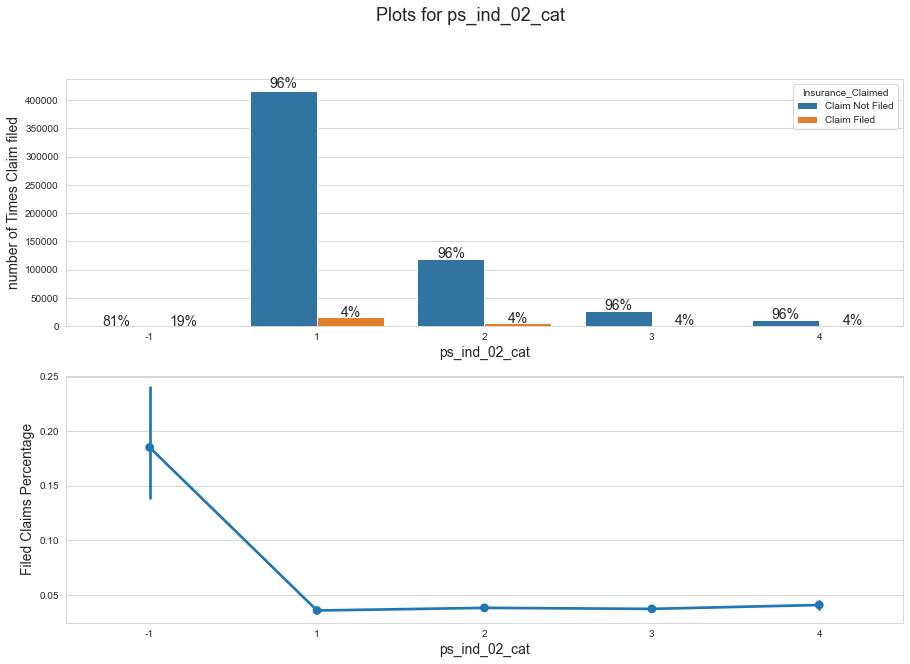

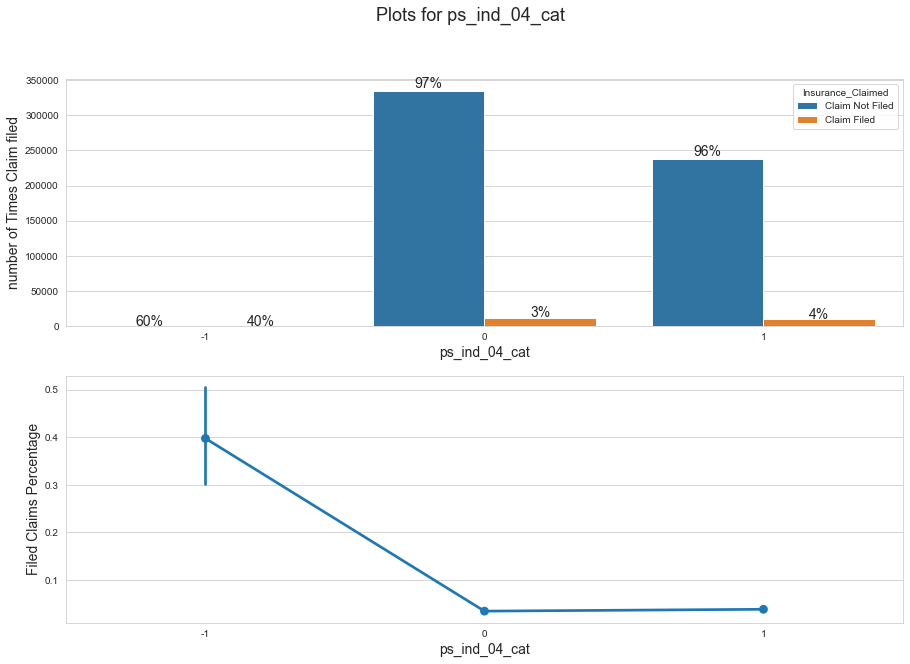

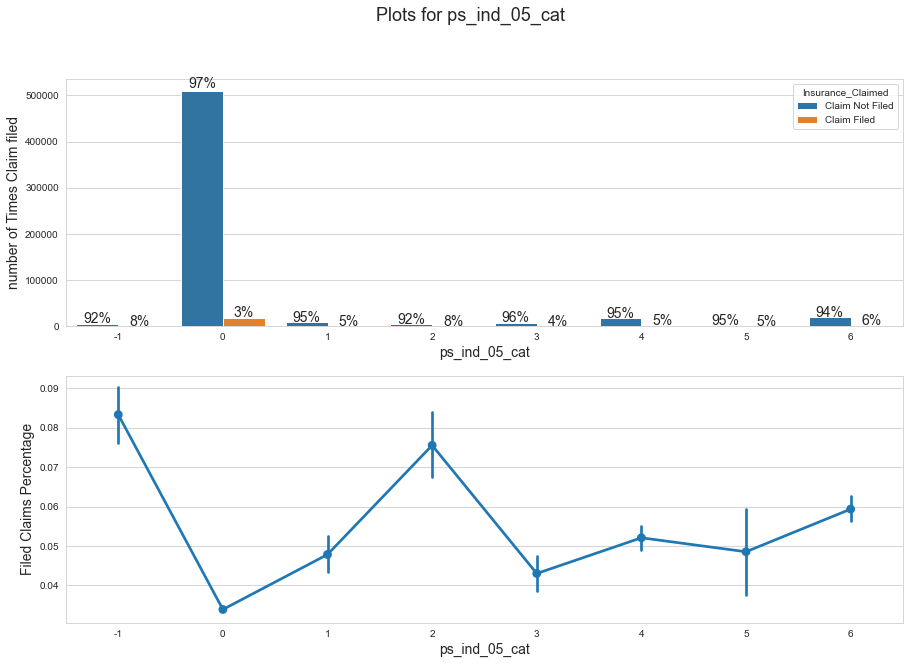

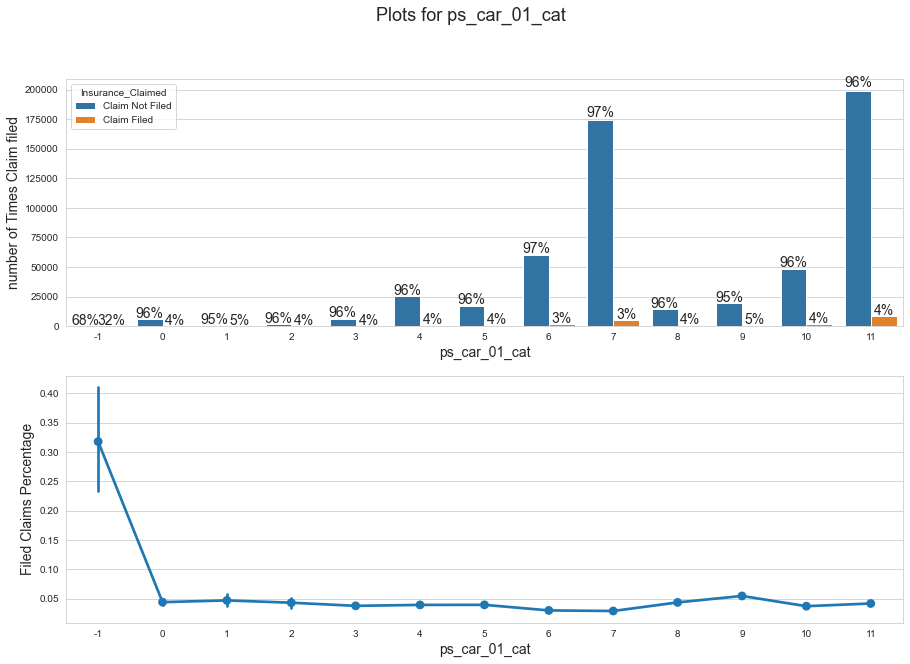

posx and posy should be finite values
posx and posy should be finite values


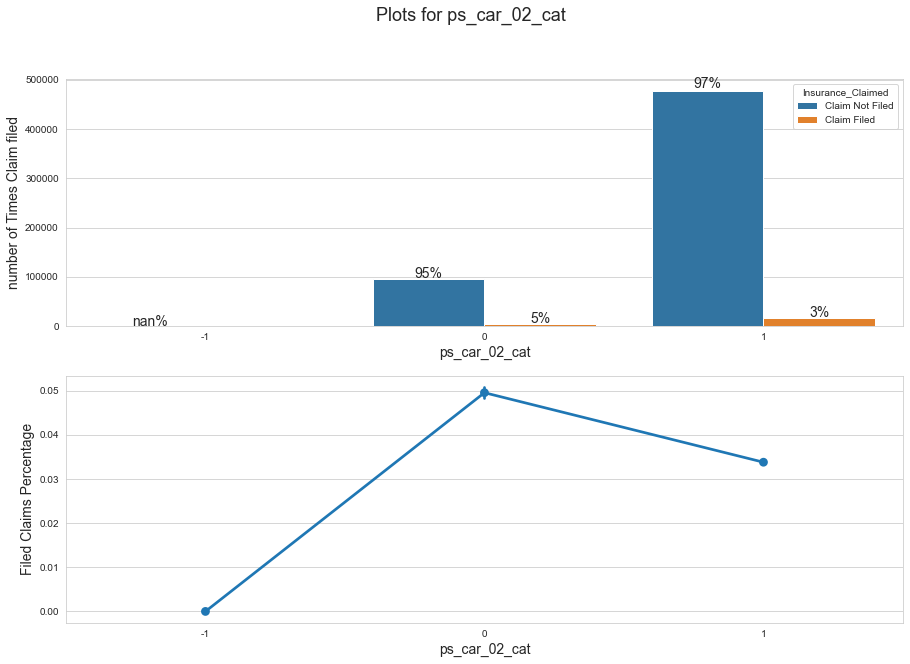

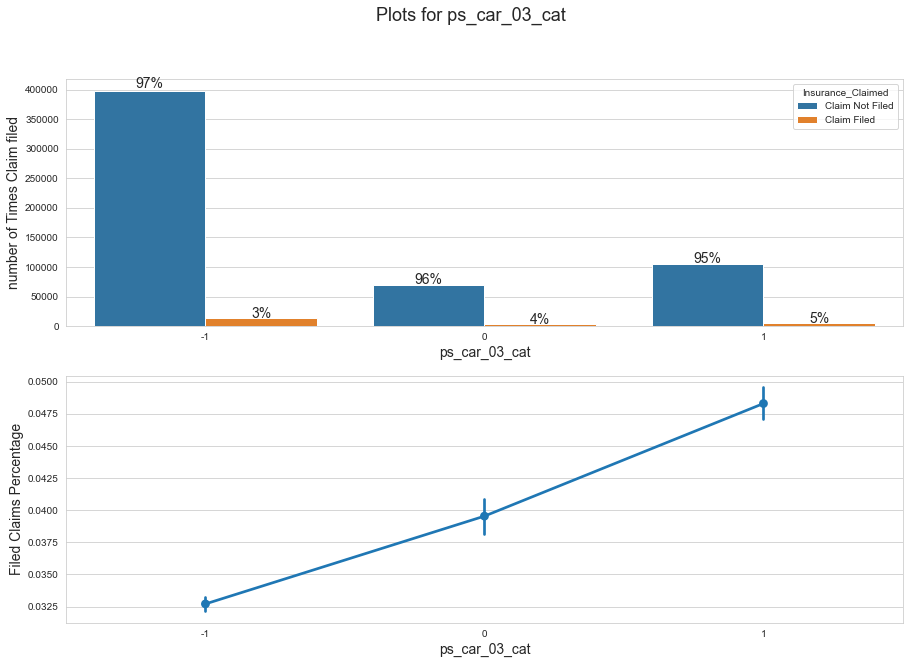

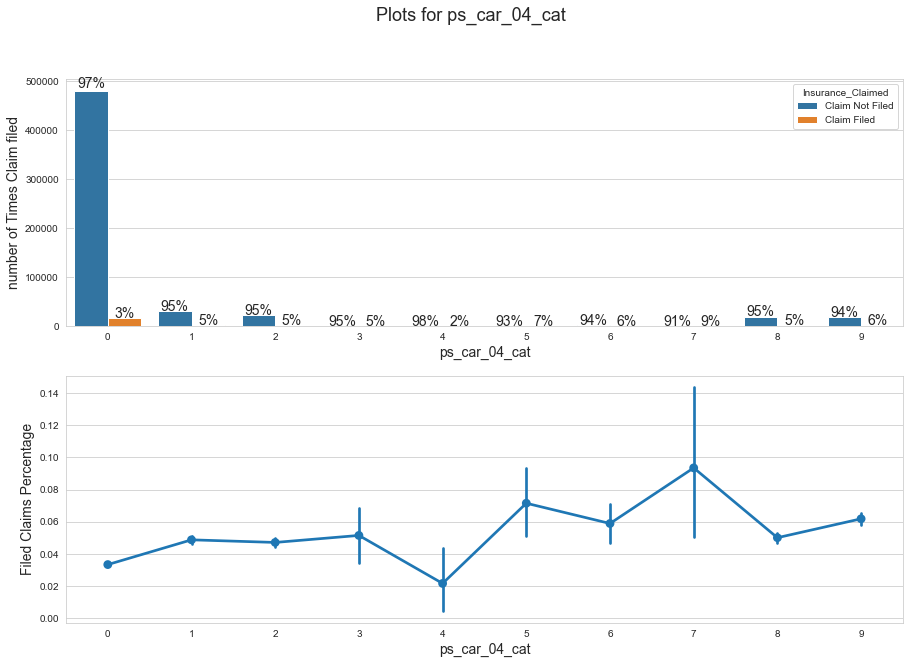

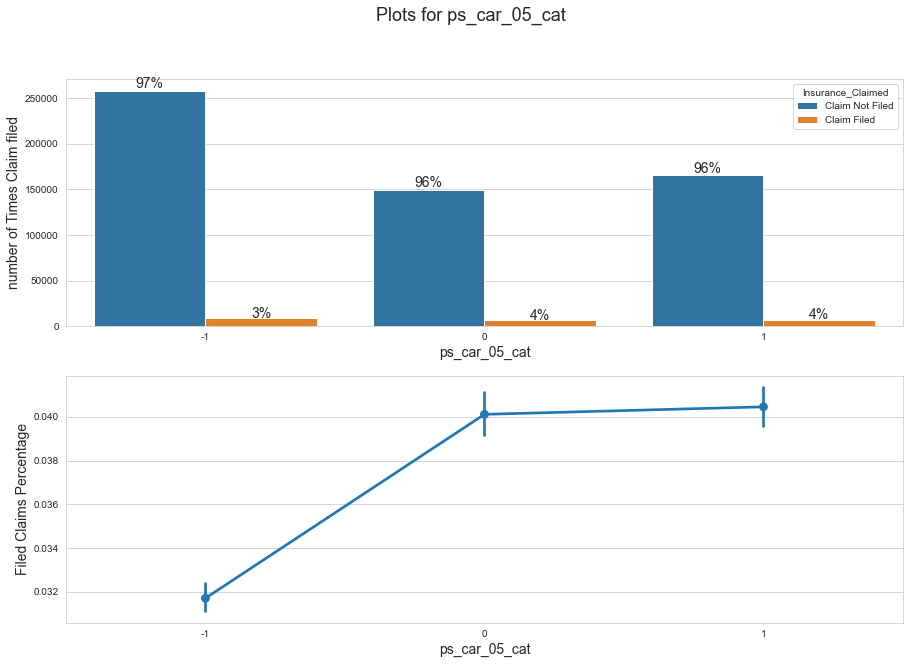

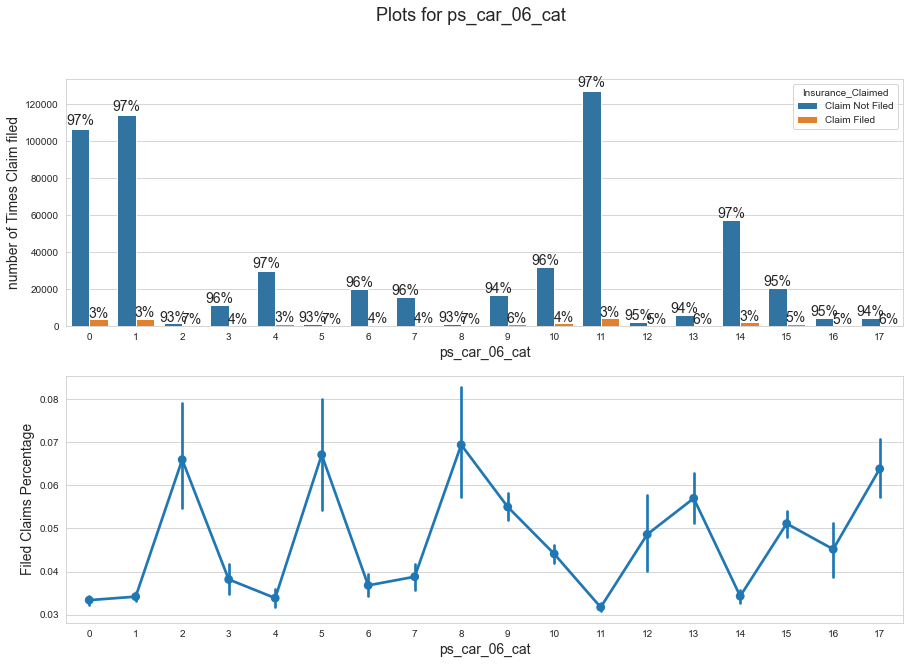

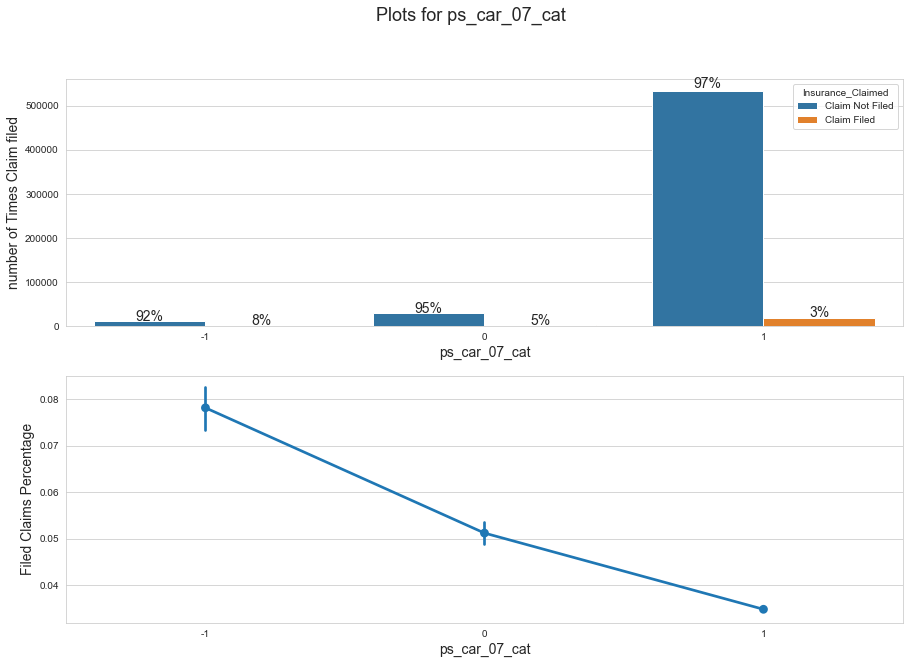

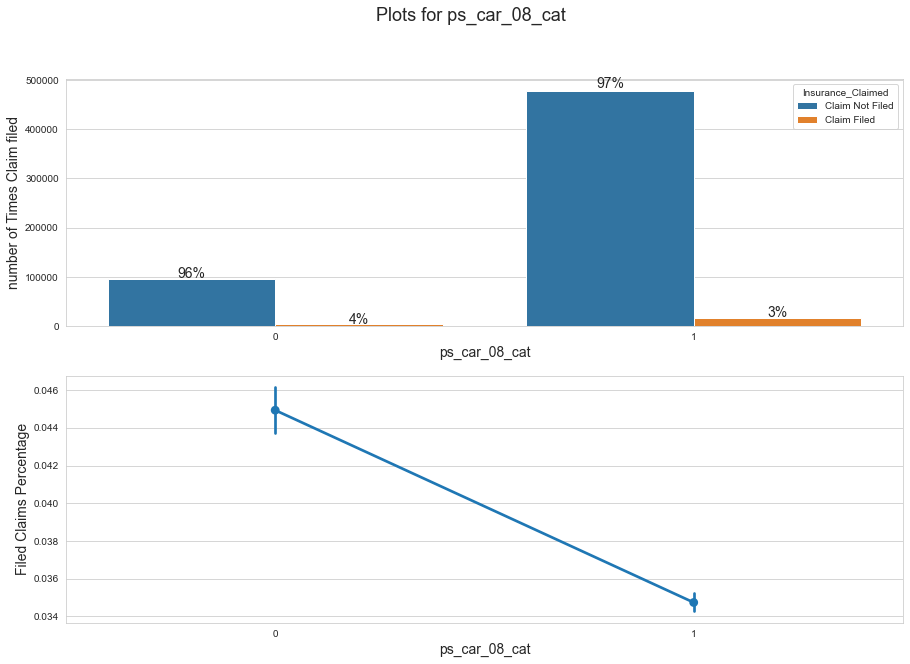

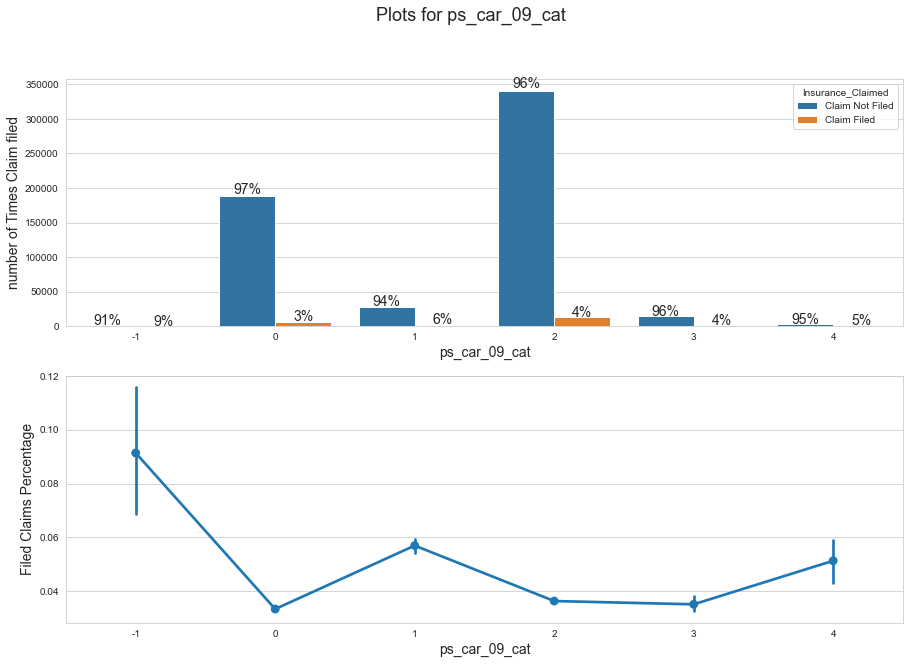

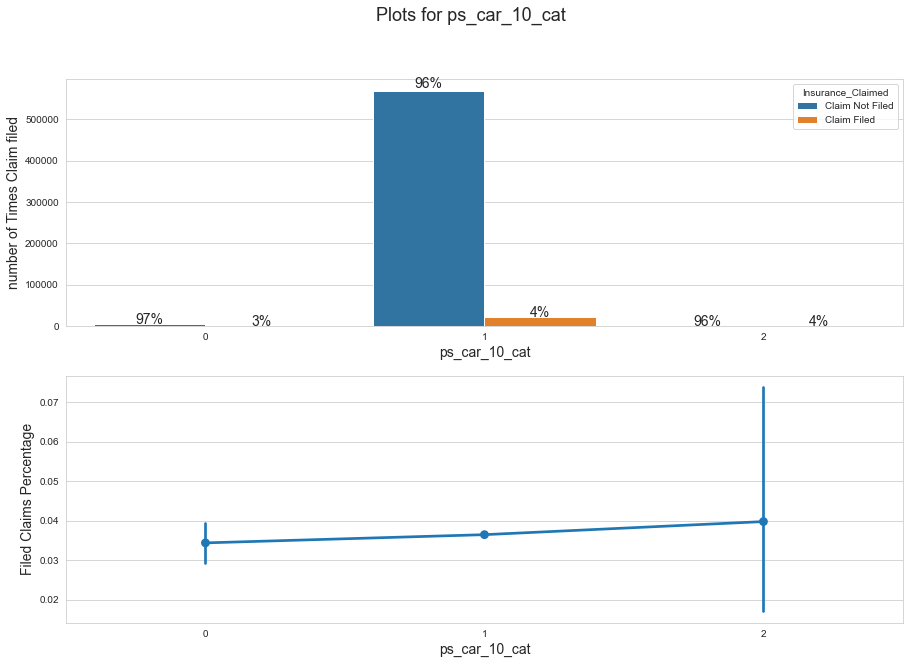

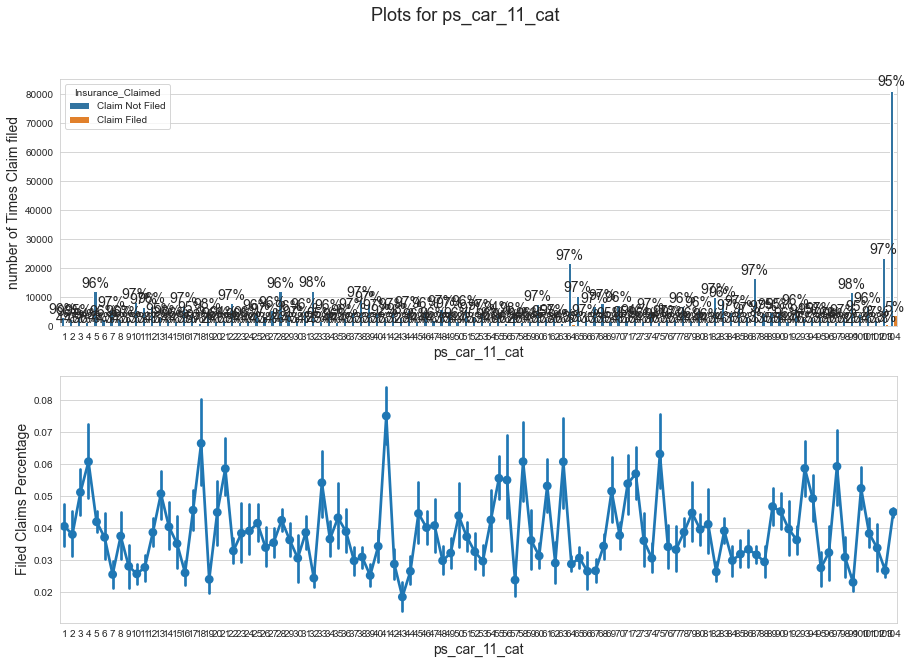

In [15]:
# We are plotting graphs for categorical features
for column in cat_features:
    fig = plt.figure(figsize=(15,10))
    ax = sns.countplot(x=column, hue="Insurance_Claimed", data=train, ax = plt.subplot(211));
    # label for x- axis for our plot.
    plt.xlabel(column, fontsize=14);
    # label for y-axis for our plot.
    plt.ylabel("number of Times Claim filed",fontsize=14)
    # Title for all columns we are plotting as part of Categorical features EDA.
    plt.suptitle('Plots for '+column, fontsize=18);
    height_value = [a.get_height() for a in ax.patches]
    num_col = int(len(height_value)/2)
    total_value = [height_value[i] + height_value[i + num_col] for i in range(num_col)] * 2
    for x, y in enumerate(ax.patches):    
        # Adding percentages
        ax.text(y.get_x()+y.get_width()/2, height_value[x]*1.01 + 1000,
        '{:1.0%}'.format(height_value[x]/total_value[x]), ha="center", size=14)
    sns.pointplot(x=column, y='target', data=train, ax = plt.subplot(212));
    plt.xlabel(column, fontsize=14);
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    plt.show()    
    

# Binary Features EDA

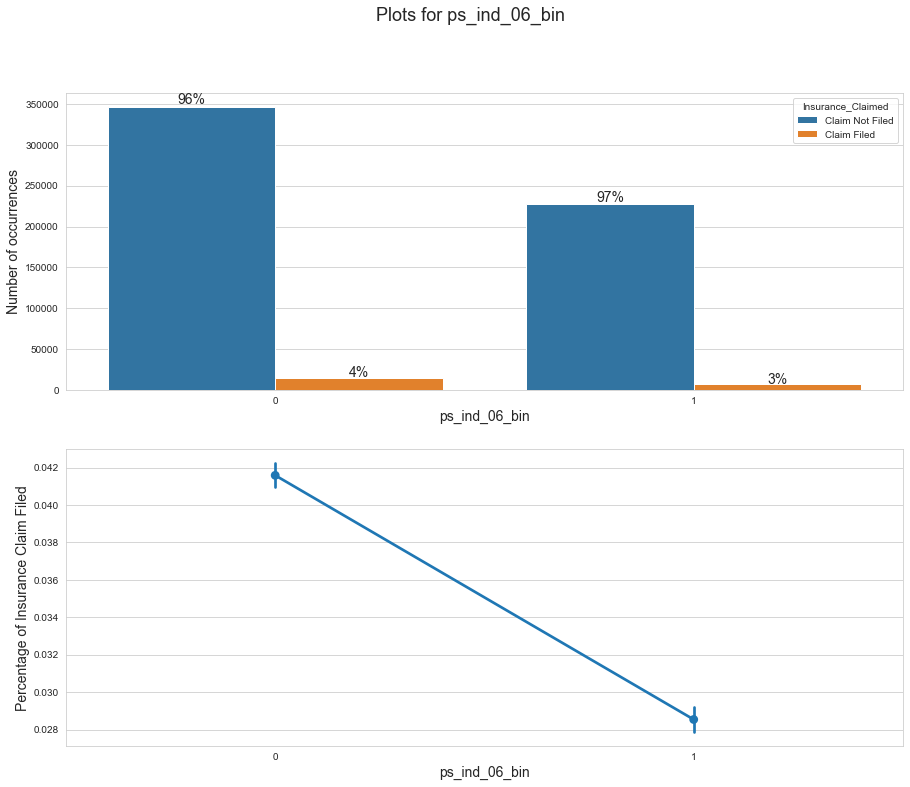

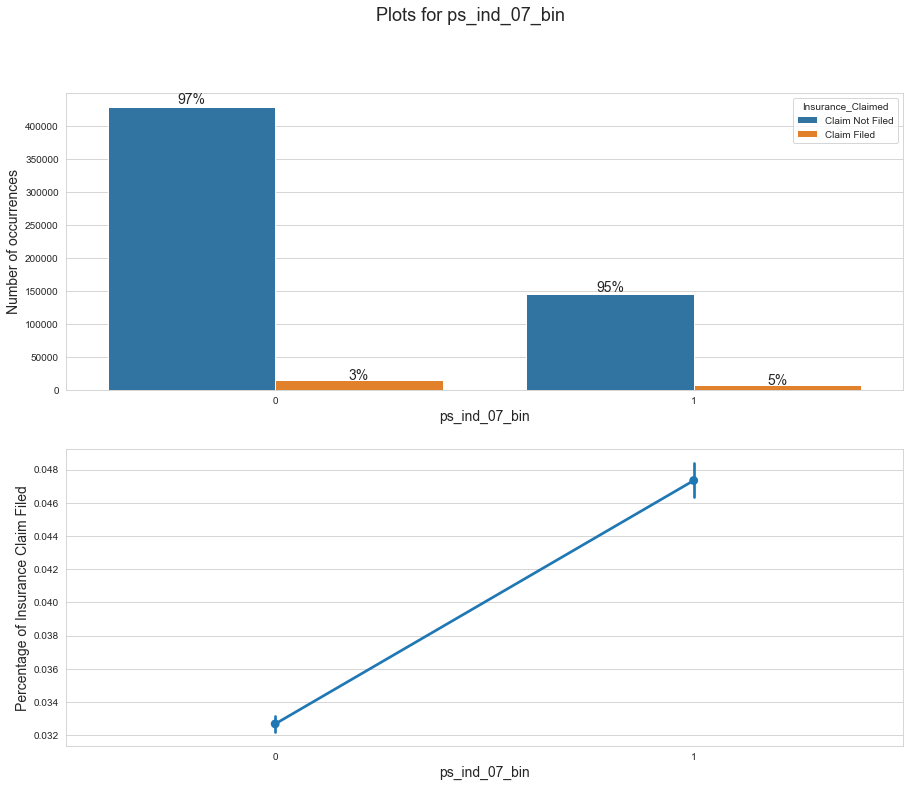

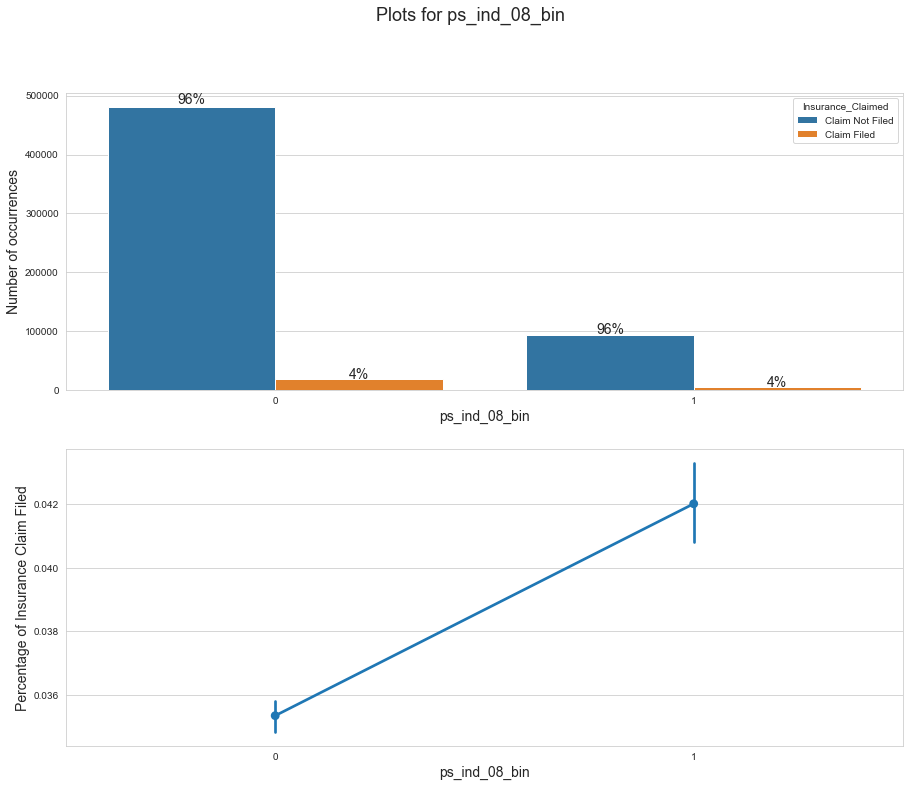

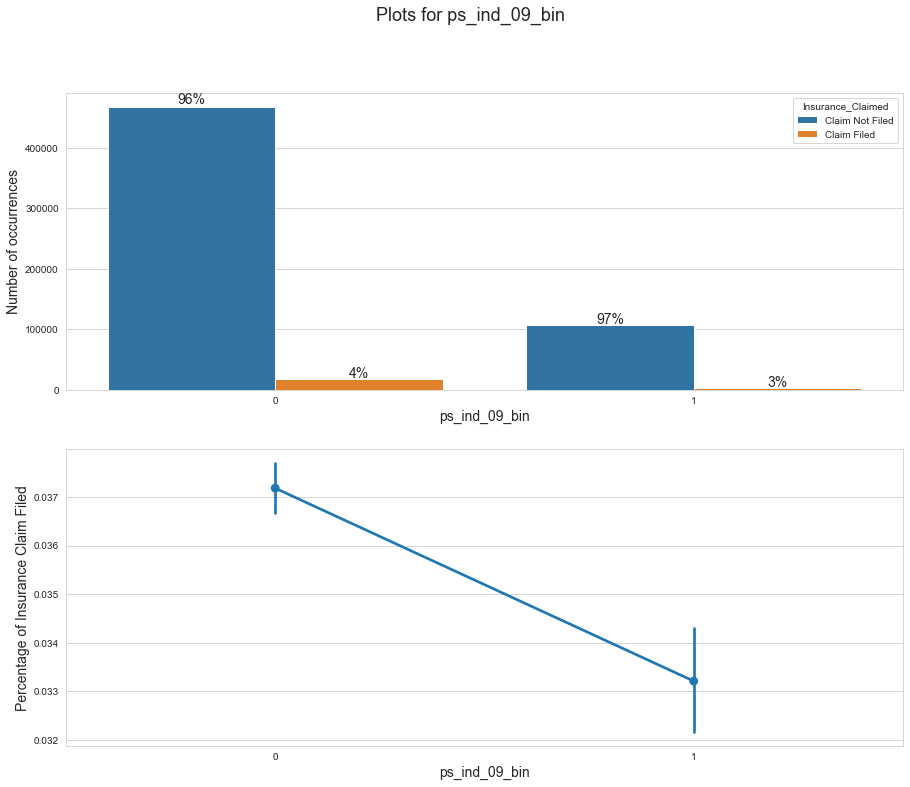

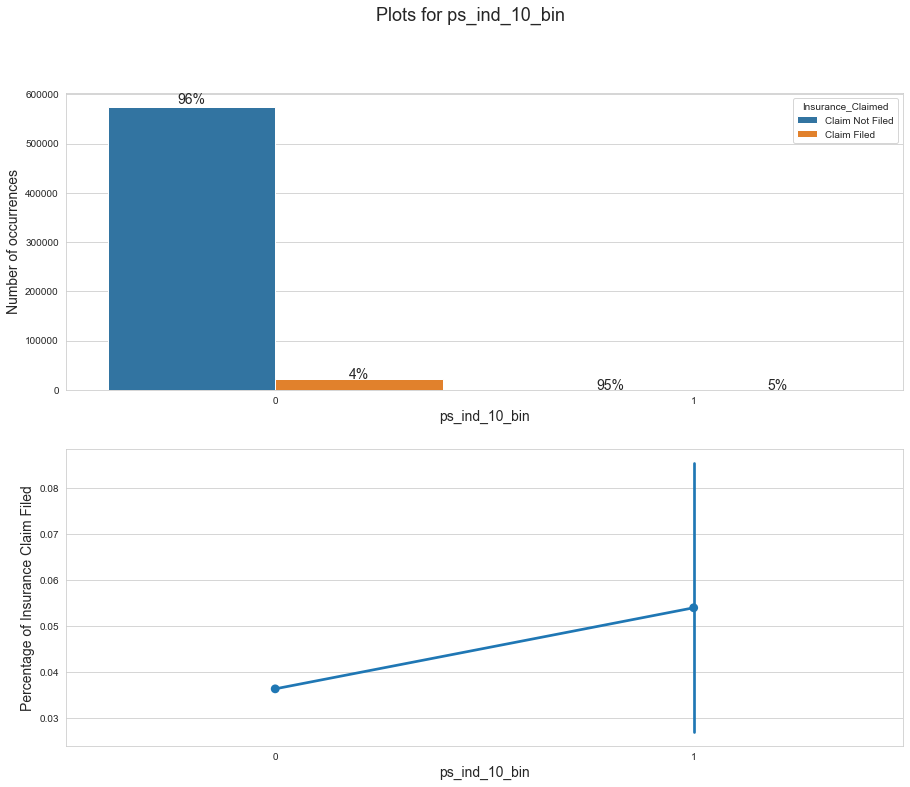

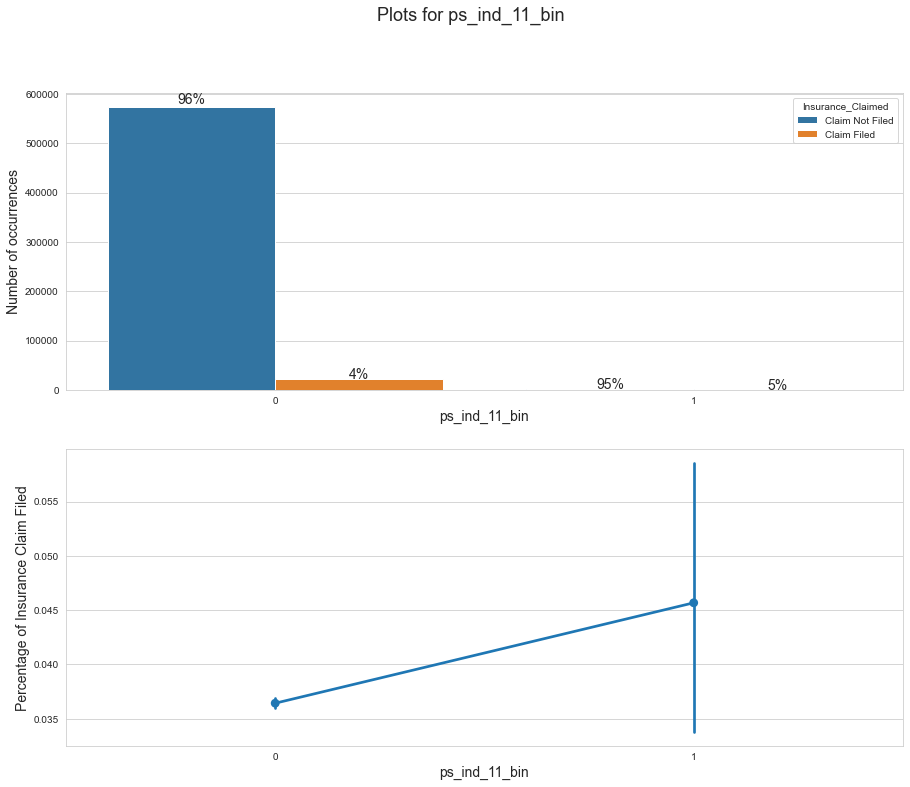

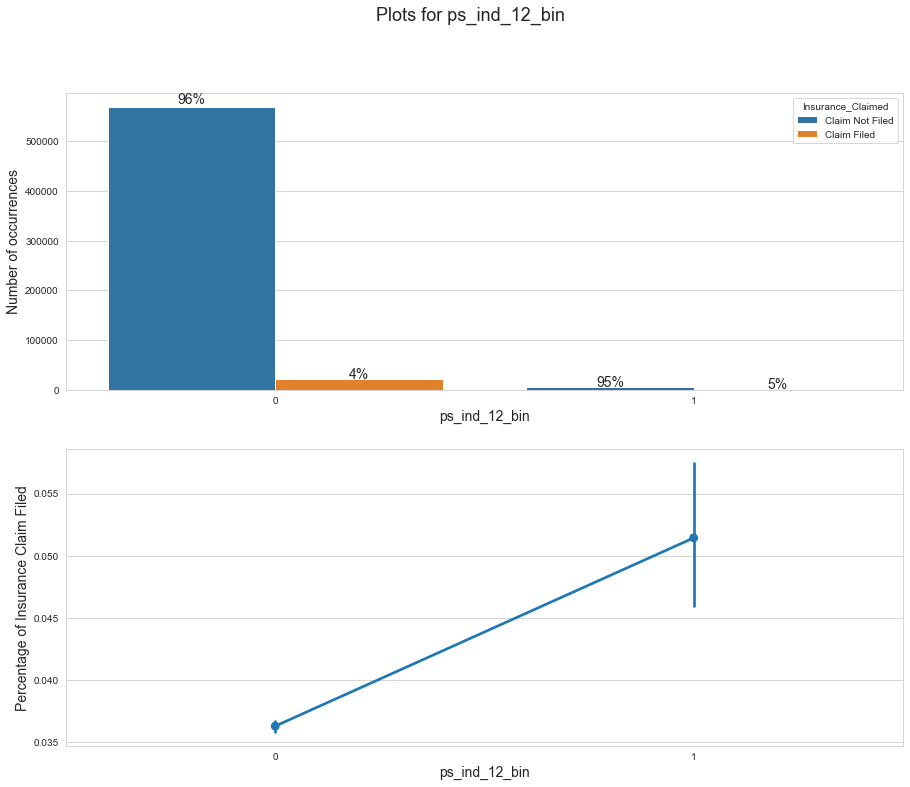

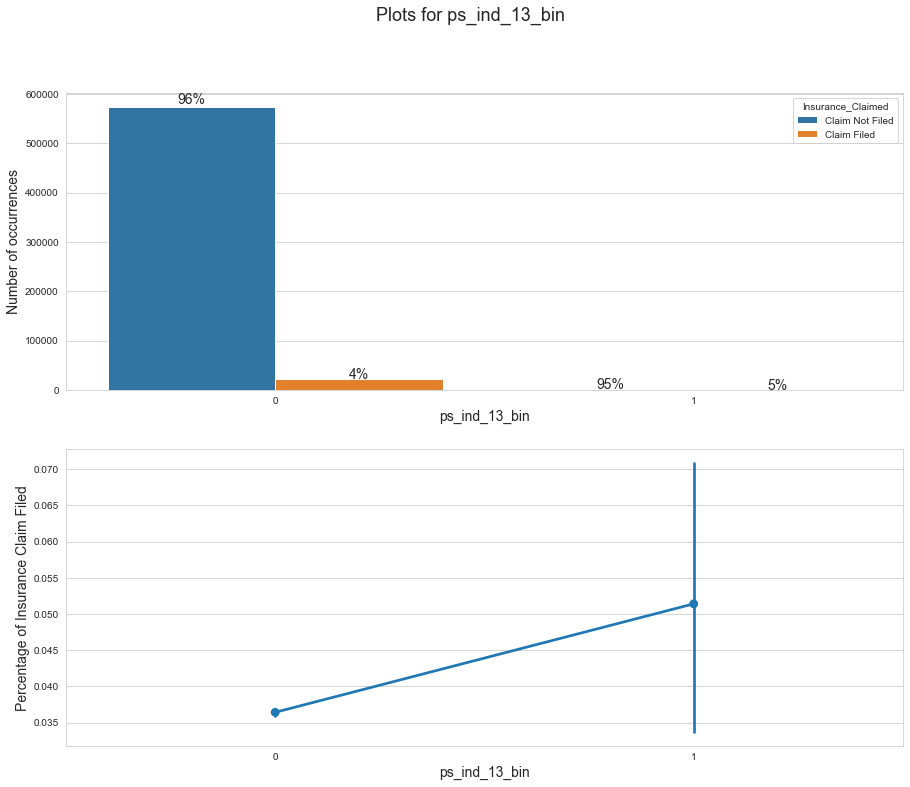

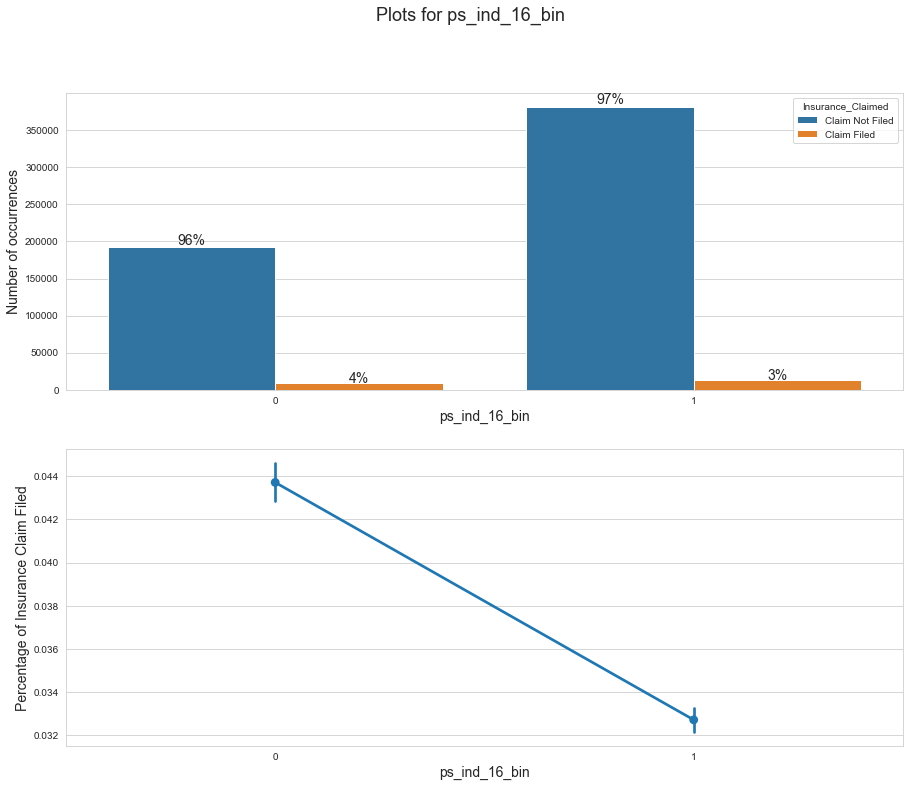

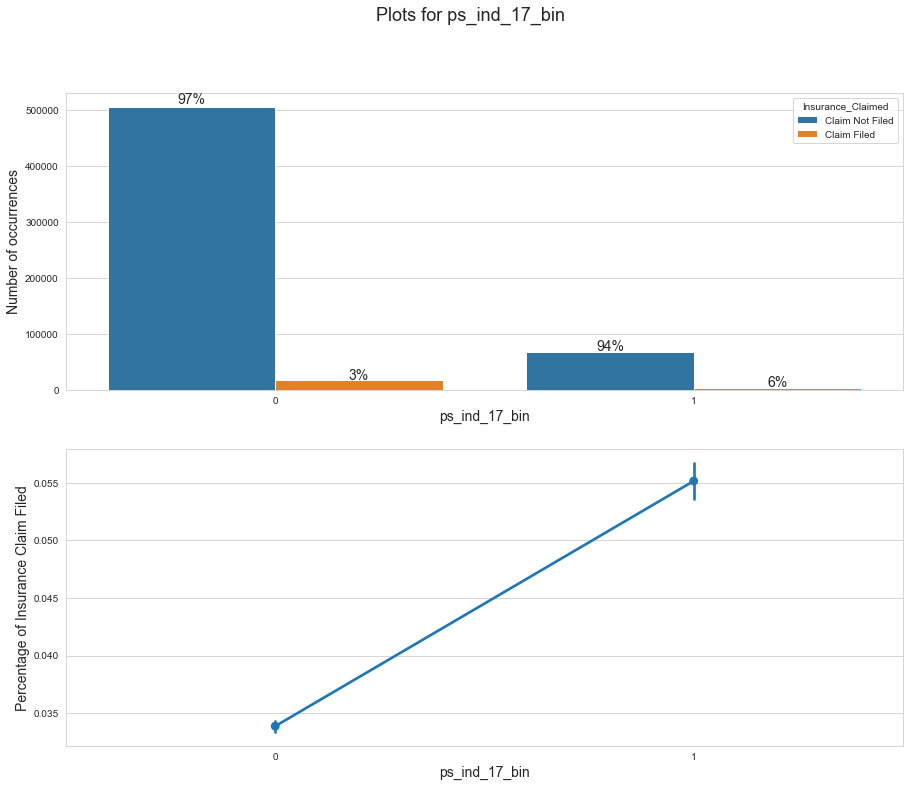

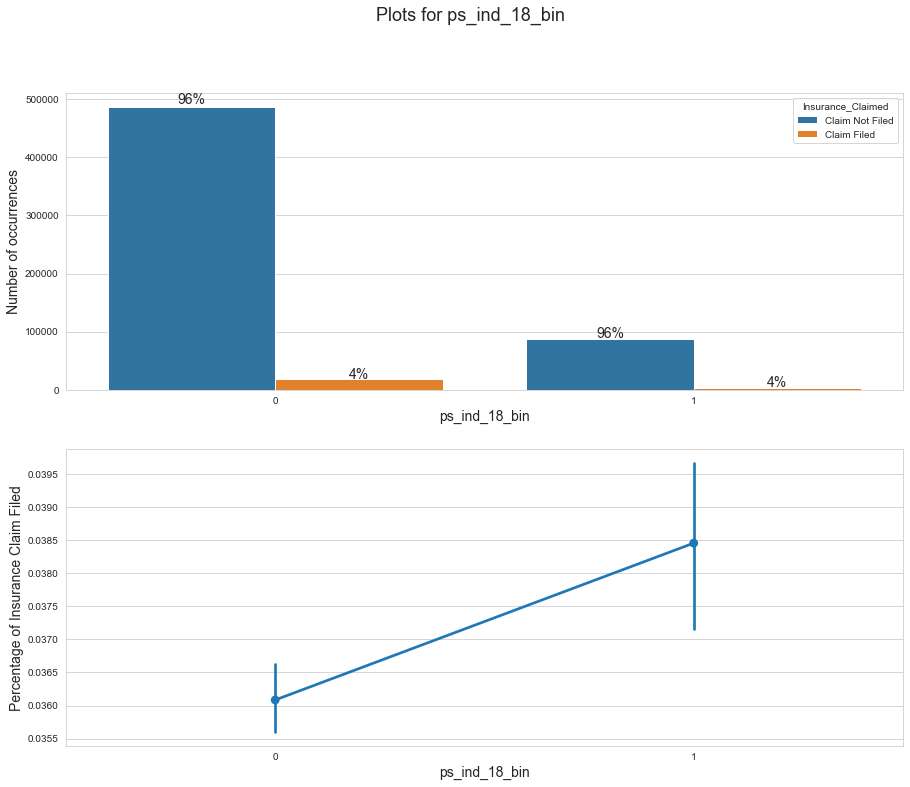

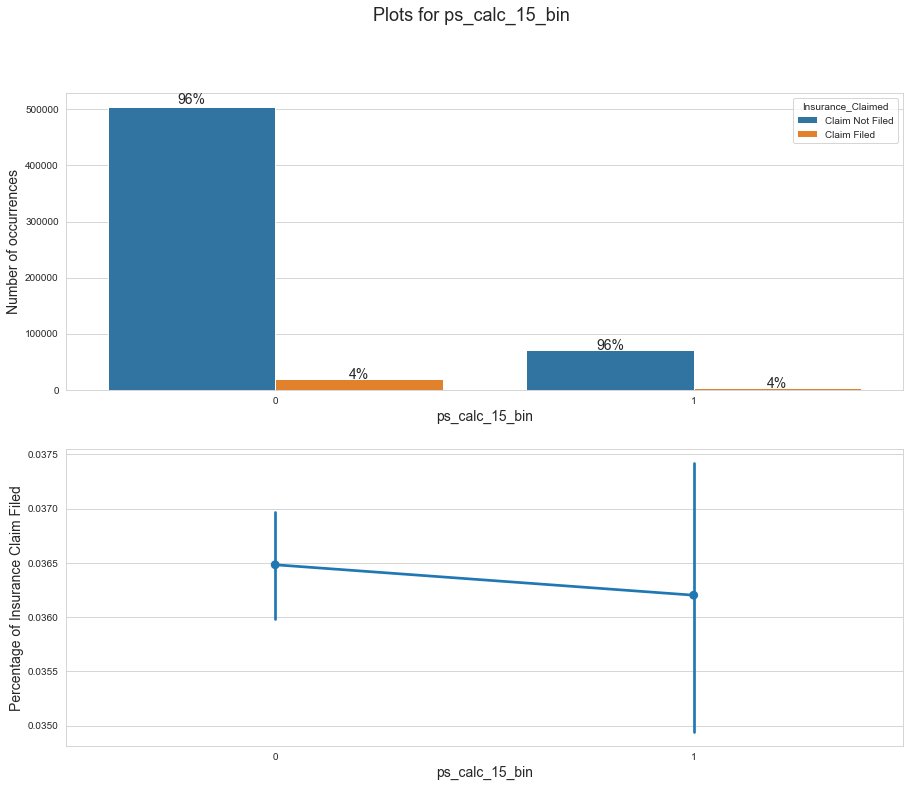

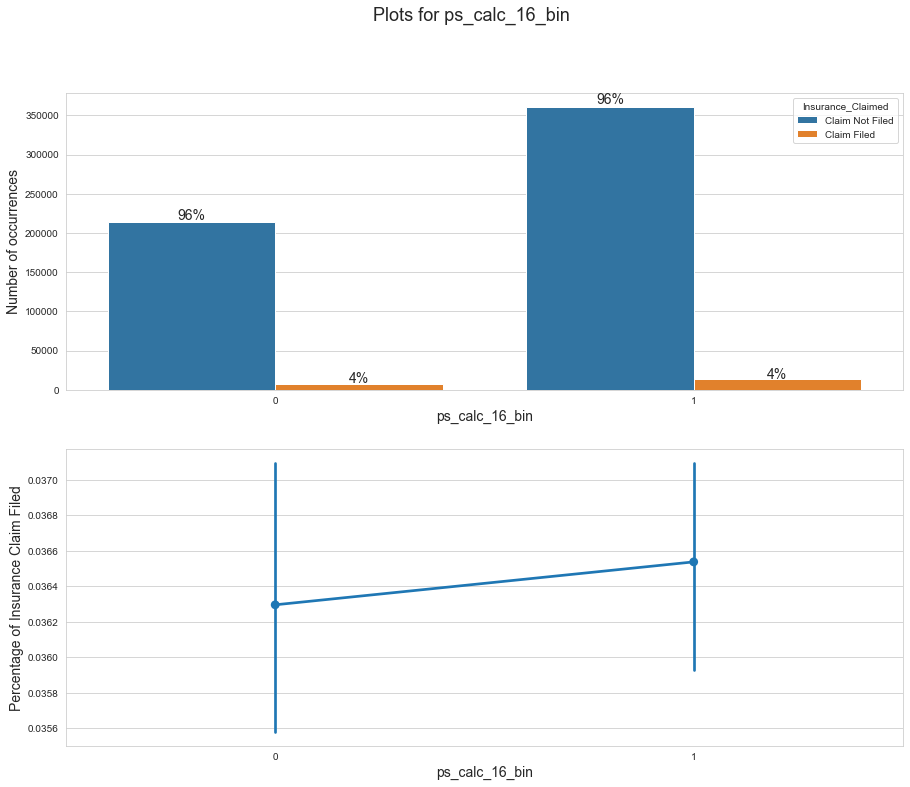

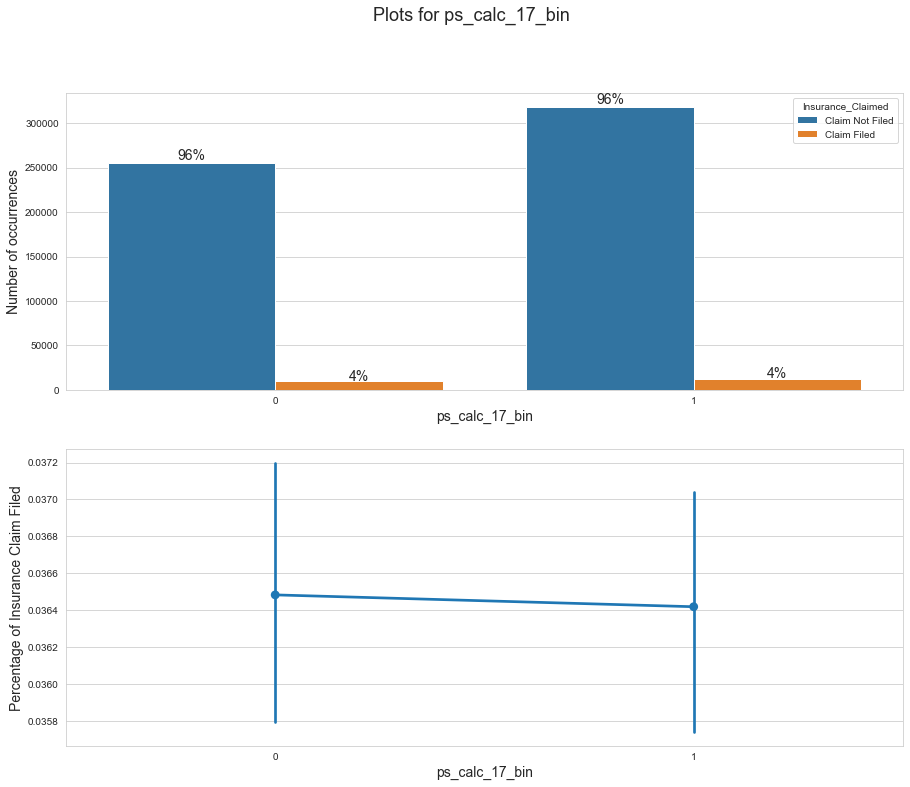

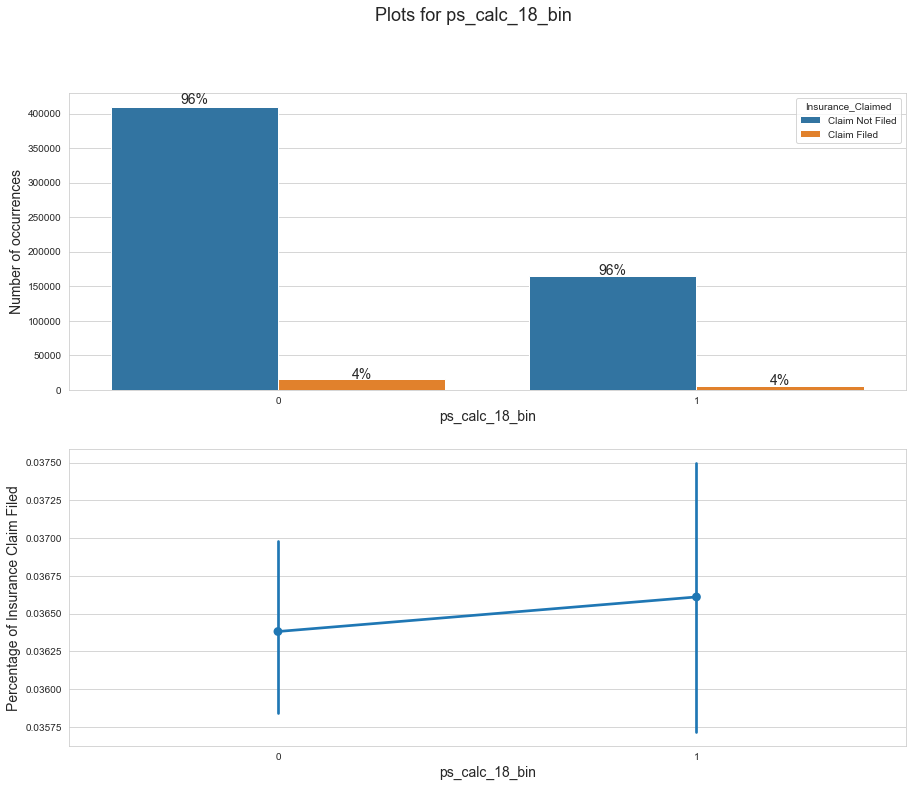

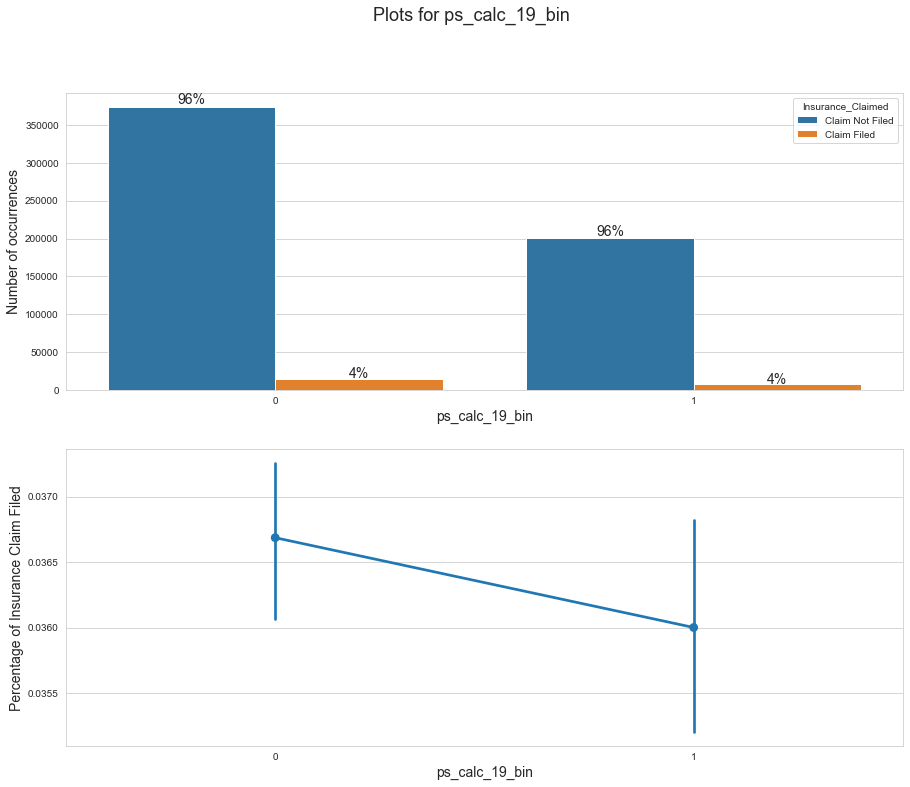

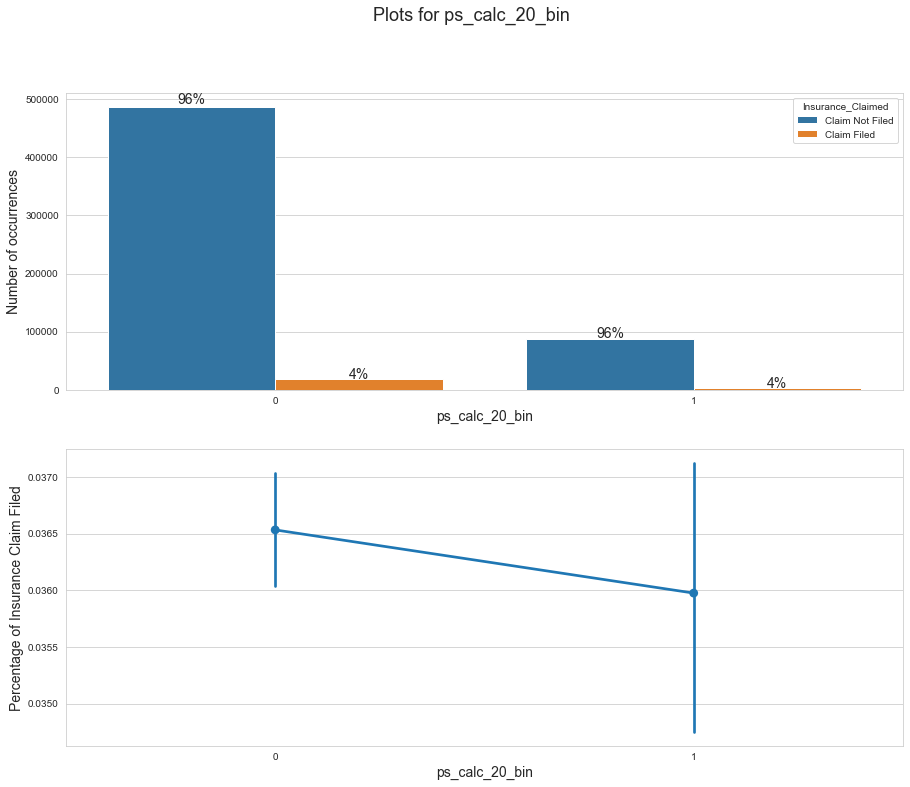

In [30]:
# We are not plotting graphs for binary features.
for column in bin_features:
    fig=plt.figure(figsize=(15,12))
    ax = sns.countplot(x=column, hue="Insurance_Claimed", data=train, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height_value = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    num_col = int(len(height_value)/2)
    # Counting total height of groups
    total_value = [height_value[i] + height_value[i + num_col] for i in range(num_col)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):
         # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height_value[i]*1.01 + 1000,
                '{:1.0%}'.format(height_value[i]/total_value[i]), ha="center", size=14) 
        

    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=train, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
     # Y-axis Label
    plt.ylabel('Percentage of Insurance Claim Filed', fontsize=14);
    # Printing Chart
    plt.show()

# Ginni Coefficient

In [31]:
predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [33]:
def gini(actual, predictions):
    assert (len(actual) == len(predictions))
    all = np.asarray(np.c_[actual, predictions, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

# Reference : https://www.kaggle.com/code/batzner/gini-coefficient-an-intuitive-explanation


In [34]:
def gini_normalized(actual, predictions):
    return gini(actual, predictions) / gini(actual, actual)

In [34]:
print(gini_normalized(actual,predictions))

0.6296296296296299


In [35]:
print(gini(actual,predictions))

0.18888888888888894


# Feature Selection

In [2]:
from sklearn.utils import resample
train_majority=train[(train['target']==0)]
train_minority=train[(train['target']==1)]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 562105, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([train_minority_upsampled, train_majority])

In [3]:
# Here we are assigning target variable to y
y=df_upsampled['target']
train=df_upsampled.drop(['target'],axis=1) # dropping the target column which is a dependent variable from our train dataset.
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)
    

Pearson correlation can be used for find correlation between features and remove the features which have high correlation.

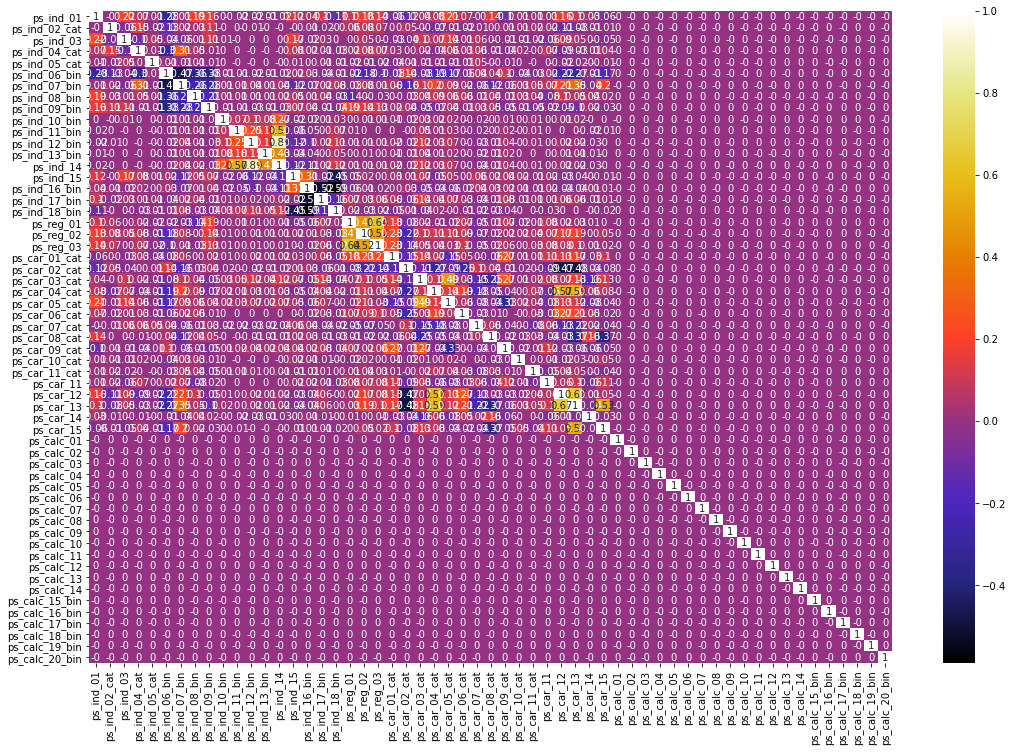

In [79]:
# plotting the correlation between the features in train data set.
plt.figure(figsize=(18,12))
cor=X_train.corr().round(2)
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap)
plt.show()

In [7]:
X_train.shape

(476169, 57)

In [8]:
X_test.shape

(119043, 57)

In [38]:
# Below code is used to calcualte Pearson-Corelation 
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for a in range(len(corr_matrix.columns)):
        for b in range(a):
            if abs(corr_matrix.iloc[a,b]) > threshold:
                col_name=corr_matrix.columns[a]
                col_corr.add(col_name)
        return col_corr
    

In [65]:
corr_features=correlation(X_train,0.9)
len(set(corr_features))

0

In [66]:
corr_features=correlation(X_test,0.9)
len(set(corr_features))

0

In [67]:
# We are trying to select important feature using information gain for classification in ML.
from sklearn.feature_selection import mutual_info_classif
# Determin the mutualinformation.
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.01267213, 0.05653526, 0.01037146, 0.02096416, 0.00197874,
       0.02001045, 0.00847013, 0.00330645, 0.00434596, 0.        ,
       0.00013244, 0.00021521, 0.0003563 , 0.        , 0.00963574,
       0.05545203, 0.00222661, 0.00274358, 0.01199734, 0.0042184 ,
       0.00489238, 0.0287448 , 0.08601732, 0.06329168, 0.00351526,
       0.03565931, 0.01481512, 0.10722826, 0.08571578, 0.06499063,
       0.12037312, 0.00571772, 0.05106755, 0.00702064, 0.00171228,
       0.00204861, 0.01107361, 0.0050167 , 0.00449738, 0.00479313,
       0.02812056, 0.02679877, 0.02606883, 0.02177363, 0.02523037,
       0.02493795, 0.01082639, 0.01329691, 0.0236701 , 0.01782782,
       0.01138432, 0.00170044, 0.04877219, 0.03843793, 0.01027035,
       0.01460182, 0.00293438])

In [69]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False) # sorting the mutual information is descending order.

ps_car_10_cat     0.120373
ps_car_07_cat     0.107228
ps_car_02_cat     0.086017
ps_car_08_cat     0.085716
ps_car_09_cat     0.064991
ps_car_03_cat     0.063292
ps_ind_02_cat     0.056535
ps_ind_16_bin     0.055452
ps_car_11         0.051068
ps_calc_16_bin    0.048772
ps_calc_17_bin    0.038438
ps_car_05_cat     0.035659
ps_car_01_cat     0.028745
ps_calc_04        0.028121
ps_calc_05        0.026799
ps_calc_06        0.026069
ps_calc_08        0.025230
ps_calc_09        0.024938
ps_calc_12        0.023670
ps_calc_07        0.021774
ps_ind_04_cat     0.020964
ps_ind_06_bin     0.020010
ps_calc_13        0.017828
ps_car_06_cat     0.014815
ps_calc_19_bin    0.014602
ps_calc_11        0.013297
ps_ind_01         0.012672
ps_reg_01         0.011997
ps_calc_14        0.011384
ps_car_15         0.011074
ps_calc_10        0.010826
ps_ind_03         0.010371
ps_calc_18_bin    0.010270
ps_ind_15         0.009636
ps_ind_07_bin     0.008470
ps_car_12         0.007021
ps_car_11_cat     0.005718
p

In [71]:
from sklearn.feature_selection import SelectKBest

In [73]:
# we are selecting top 10 important features
select_ten_col=SelectKBest(mutual_info_classif,k=10)
select_ten_col.fit(X_train,y_train)
X_train.columns[select_ten_col.get_support()]

Index(['ps_ind_02_cat', 'ps_ind_16_bin', 'ps_car_02_cat', 'ps_car_03_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11', 'ps_calc_16_bin'],
      dtype='object')

# Phase 3 - Model building

Logistic Regression

In [4]:
# Here we have implemented Logistic Regression to train our train dataset.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
Y_predict_lr=log_reg.predict(X_test)
score_lr = round(accuracy_score(Y_predict_lr,y_test)*100,2)
print("The accuracy score we have achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score we have achieved using Logistic Regression is: 59.1 %


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN

In [ ]:
# we have implemented KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='brute',n_jobs=-1)
knn.fit(X_train,y_train)
Y_predict_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_predict_knn,y_test)*100,2)
print("The accuracy score we have achieved using Logistic Regression is: "+str(score_knn)+" %")

SVM

In [6]:
from sklearn.svm import LinearSVC
svm=LinearSVC(class_weight='balanced',C=0.0001)
svm.fit(X_train,y_train)
Y_predict_svm=svm.predict(X_test)
score_svm=round(accuracy_score(Y_predict_svm,y_test)*100,2)
print("The accuracy score we have achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score we have achieved using Linear SVM is: 59.09 %


Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
Y_predict_dt=clf.predict(X_test)
score_dt = round(accuracy_score(Y_predict_dt,y_test)*100,2)
print("The accuracy score we have achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score we have achieved using Decision Tree is: 97.51 %


Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)
y_predict_rf=rfc.predict(X_test)
score_rfc = round(accuracy_score(y_predict_rf,y_test)*100,2)
print("The accuracy score we have achieved using Random Forest is: "+str(score_rfc)+" %")

The accuracy score we have achieved using Random Forest is: 100.0 %


Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_predict_nb=gnb.predict(X_test)
score_nb = round(accuracy_score(y_predict_nb,y_test)*100,2)
print("The accuracy score we have achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score we have achieved using Naive Bayes is: 57.59 %


# Confusion Matrix

********Logistic Regression***********


<AxesSubplot:>

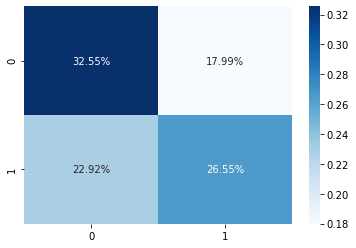

In [15]:
from sklearn.metrics import confusion_matrix
print("********Logistic Regression***********")
conf_matrix_LR=confusion_matrix(y_test, Y_predict_lr)
sns.heatmap(conf_matrix_LR/np.sum(conf_matrix_LR), annot=True, 
            fmt='.2%', cmap='Blues')


********Naive bayes***********


<AxesSubplot:>

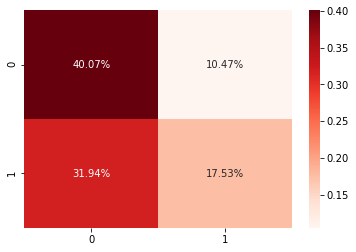

In [27]:
print("********Naive bayes***********")
conf_matrix_NB=confusion_matrix(y_test,y_predict_nb)
sns.heatmap(conf_matrix_NB/np.sum(conf_matrix_NB), annot=True, 
            fmt='.2%', cmap='Reds')

********Support Vector Machine***********


<AxesSubplot:>

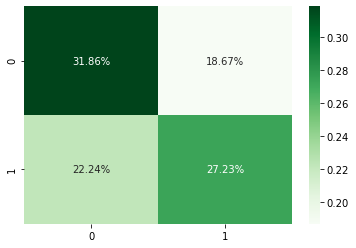

In [18]:
print("********Support Vector Machine***********")
conf_matrix_SVM=confusion_matrix(y_test,Y_predict_svm)
sns.heatmap(conf_matrix_SVM/np.sum(conf_matrix_SVM), annot=True, 
            fmt='.2%', cmap='Greens')

********Random Forest***********


<AxesSubplot:>

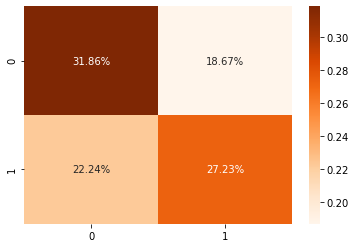

In [23]:
print("********Random Forest***********")
conf_matrix_RF=confusion_matrix(y_test,y_predict_rf)
sns.heatmap(conf_matrix_SVM/np.sum(conf_matrix_RF), annot=True, 
            fmt='.2%', cmap='Oranges')

********Decision Tree***********


<AxesSubplot:>

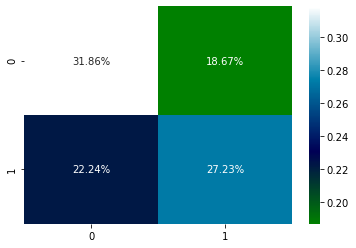

In [31]:
print("********Decision Tree***********")
conf_matrix_DT=confusion_matrix(y_test,Y_predict_dt)
sns.heatmap(conf_matrix_SVM/np.sum(conf_matrix_DT), annot=True, 
            fmt='.2%', cmap='ocean')

# Precision,Recall and F1-Score of all models

In [44]:
# We are calculating Precision,Recall and F1 score for Logistic Regression Model.
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
print("*************Logistic Regression Model************")
print(classification_report(y_test,Y_predict_lr,zero_division=0))
print("*************Support Vector Machine**************")
print(classification_report(y_test,Y_predict_svm))
print("*************Random Forest**************")
print(classification_report(y_test,y_predict_rf))
print("*************Naive bayes**************")
print(classification_report(y_test,y_predict_nb))
print("*************Decision Tree**************")
print(classification_report(y_test,Y_predict_dt))

*************Logistic Regression Model************
              precision    recall  f1-score   support

           0       0.59      0.64      0.61    114778
           1       0.60      0.54      0.56    112347

    accuracy                           0.59    227125
   macro avg       0.59      0.59      0.59    227125
weighted avg       0.59      0.59      0.59    227125

*************Support Vector Machine**************
              precision    recall  f1-score   support

           0       0.59      0.63      0.61    114778
           1       0.59      0.55      0.57    112347

    accuracy                           0.59    227125
   macro avg       0.59      0.59      0.59    227125
weighted avg       0.59      0.59      0.59    227125

*************Random Forest**************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114778
           1       1.00      1.00      1.00    112347

    accuracy                           1

In [43]:
gini(y_test,Y_predict_lr)
print("Gini Coeeficient for Logistic Regression is :"+ str(gini(y_test,Y_predict_lr)))

Gini Coeeficient for Logistic Regression is :0.04610656529938137


In [42]:
gini(y_test,y_predict_rf)
print("Gini Coeeficient for Random Forest :"+ str(gini(y_test,y_predict_rf)))

Gini Coeeficient for Random Forest :0.2526758392955421


In [41]:
gini(y_test,y_predict_nb)
print("Gini Coeeficient for Naive bayes is :"+ str(gini(y_test,y_predict_nb)))

Gini Coeeficient for Naive bayes is :0.03775935594306377


In [40]:
gini(y_test,Y_predict_svm)
print("Gini Coeeficient for Logistic Regression is :"+ str(gini(y_test,Y_predict_lr)))

Gini Coeeficient for Logistic Regression is :0.04610656529938137


In [39]:
gini(y_test,Y_predict_dt)
print("Gini Coeeficient for Decision Tree is :"+ str(gini(y_test,Y_predict_dt)))

Gini Coeeficient for Decision Tree is :0.24041001202839316


In [38]:
gini_normalized(y_test,Y_predict_lr)
print("Gini Normalized for Logistic Regression is :"+ str(gini_normalized(y_test,Y_predict_lr)))

Gini Normalized for Logistic Regression is :0.18247318551677139


In [37]:
gini_normalized(y_test,y_predict_nb)
print("Gini Normalized for Naive Bayes is :"+ str(gini_normalized(y_test,y_predict_nb)))

Gini Normalized for Naive Bayes is :0.14943793616491588


In [36]:
gini_normalized(y_test,Y_predict_dt)
print("Gini Normalized for Decision Tree is :"+ str(gini_normalized(y_test,Y_predict_dt)))

Gini Normalized for Decision Tree is :0.951456271793354


In [35]:
gini_normalized(y_test,y_predict_rf)
print("Gini Normalized for Random Forest is :"+ str(gini_normalized(y_test,y_predict_rf)))

Gini Normalized for Random Forest is :1.0
